<h1 style="font-size:60px;" align="center"> EASYMONEY CAPSTONE PROJECT <h1>

<h2 style="font-size:50px;" align="center"> SEGMENTATION <h2>

<h3 style="font-size:40px;" align="justify"> CONTENT <h3>

<h4 style="font-size:30px;"><b> A. CLUSTERING </b></h4>

<div style="font-size:26px;">
    <ol>
    <li>Group the dataset by client</li>
        <ul>
        <li>1.1 Segment Universitários</li>
        <li>1.2 Segment No Universitários</li>
        </ul>
    <li>Standarization</li>
        <ul>
            <li>2.1 Segment Universitários</li>
            <li>2.2 Segment No Universitários</li>
            </ul>
    <li>Perform Principal Component Analysis</li>
        <ul>
            <li>3.1 Segment Universitários</li>
            <li>3.2 Segment No Universitários</li>
            </ul>
    <li>Perform K-Means</li>
        <ul>
            <li>4.1 Segment Universitários</li>
            <li>4.2 Segment No Universitários</li>
            </ul>
    </ol>
</div>

<h4 style="font-size:30px;"><b> B. CLUSTERS ANALYSIS </b></h4>
<div style="font-size:26px;">
    <ol>
    <li>Clusters Universitários</li>   
    <li>Clusters No Universitários</li> 
    </ol>
</div>

<h4 style="font-size:30px;"><b> C. SAVE THE FILES </b></h4>




## IMPORT LIBRARIES + DATASETS

In [89]:
import pandas as pd
import numpy as np
import warnings as ws
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as ply

pio.templates.default = "plotly_white"
pd.options.plotting.backend = "plotly"

ws.filterwarnings("ignore")

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn import ensemble

segmentation_df = pd.read_csv("data/sales_included_df.csv")
segmentation_df = segmentation_df.rename(columns={"Unnamed: 0": "id"})

## PRINT HEAD FOR THE ENTITY

In [90]:
segmentation_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
pk_cid,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586,1375586
pk_partition,2018-01-28,2018-02-28,2018-03-28,2018-04-28,2018-05-28,2018-06-28,2018-07-28,2018-08-28,2018-09-28,2018-10-28,2018-11-28,2018-12-28,2019-01-28,2019-02-28,2019-03-28
entry_date,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12,2018-01-12
entry_channel,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL,KHL
active_customer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
entry_counting,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
segment_,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
salary_level,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
total_sales,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
segmentation_df.columns

Index(['pk_cid', 'pk_partition', 'entry_date', 'entry_channel',
       'active_customer', 'short_term_deposit', 'loans', 'mortgage', 'funds',
       'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
       'payroll', 'pension_plan', 'payroll_account', 'emc_account',
       'debit_card', 'em_account_p', 'em_acount', 'country_id', 'region_code',
       'gender', 'age', 'deceased', 'salary', 'salary_unknown', 'Age_group',
       'new_customer', 'sale_short_term_deposit', 'sale_loans',
       'sale_mortgage', 'sale_funds', 'sale_securities',
       'sale_long_term_deposit', 'sale_credit_card', 'sale_payroll',
       'sale_pension_plan', 'sale_payroll_account', 'sale_emc_account',
       'sale_debit_card', 'sale_em_account_p', 'sale_em_acount', 'churn_loans',
       'churn_short_term_deposit', 'churn_mortgage', 'churn_funds',
       'churn_securities', 'churn_long_term_deposit', 'churn_credit_card',
       'churn_payroll', 'churn_pension_plan', 'churn_payroll_account',
    

In [92]:
segmentation_df.dtypes

pk_cid               int64
pk_partition        object
entry_date          object
entry_channel       object
active_customer    float64
                    ...   
entry_counting       int64
segment_             int64
salary_level         int64
total_sales          int64
total_churns         int64
Length: 62, dtype: object

We change the types of entry_date and pk_partition to datetime.

In [93]:
segmentation_df["entry_date"]=pd.to_datetime(segmentation_df["entry_date"],format='%Y-%m-%d')
segmentation_df["pk_partition"]=pd.to_datetime(segmentation_df["pk_partition"],format='%Y-%m-%d')
segmentation_df["entry_date_month"] = segmentation_df["entry_date"].dt.month
segmentation_df["entry_date_year"] = segmentation_df["entry_date"].dt.month

There are created new columns with the sum of sales for each product by product type:
- **Saving Products**: Long term deposits, pension plans and short term deposits;
- **Financing Products**: Funds and securities;
- **Investment Products**: Credit cards, loans and mortgage;
- **Accounts Products**: Debit cards, EM acounts, EMC accounts, Payroll, Payroll accounts and EM accounts P.

In [94]:
segmentation_df["savings_sold"] = segmentation_df[['sale_long_term_deposit','sale_pension_plan','sale_short_term_deposit']].sum(axis=1)
segmentation_df["financing_sold"] = segmentation_df[['sale_funds','sale_securities']].sum(axis=1)
segmentation_df["invesment_sold"] = segmentation_df[['sale_credit_card','sale_loans','sale_mortgage']].sum(axis=1)
segmentation_df["account_type_sold"] = segmentation_df[['sale_debit_card','sale_em_acount','sale_emc_account', 'sale_payroll','sale_payroll_account','sale_em_account_p']].sum(axis=1)

The same approach was made to the number of products each customer stopped using.

In [95]:
segmentation_df["savings_churn"] = segmentation_df[['churn_long_term_deposit','churn_pension_plan','churn_short_term_deposit']].sum(axis=1)
segmentation_df["financing_churn"] = segmentation_df[['churn_funds','churn_securities']].sum(axis=1)
segmentation_df["invesment_churn"] = segmentation_df[['churn_credit_card','churn_loans','churn_mortgage']].sum(axis=1)
segmentation_df["account_type_churn"] = segmentation_df[['churn_debit_card','churn_em_acount','churn_emc_account', 'churn_payroll','churn_payroll_account','churn_em_account_p']].sum(axis=1)

Let's take a look on the on the percentage of products sold/stopped being used in the segment **Universitarios**

In [96]:
sales_univ=segmentation_df[['segment_','savings_sold','financing_sold','invesment_sold','account_type_sold']][segmentation_df["segment_"]==3].groupby("segment_").sum()
suma=sales_univ.sum(axis=1)
round(sales_univ/suma.values[0]*100,1)

,savings_sold,financing_sold,invesment_sold,account_type_sold
segment_,,,,
3,6.0,0.2,0.9,92.9


In [97]:
churn_univ=segmentation_df[['segment_','savings_churn','financing_churn','invesment_churn','account_type_churn']][segmentation_df["segment_"]==3].groupby("segment_").sum()
suma=churn_univ.sum(axis=1)
round(churn_univ/suma.values[0]*100,1)

,savings_churn,financing_churn,invesment_churn,account_type_churn
segment_,,,,
3,15.6,0.2,2.3,81.9


Below a table with the absolute values:

In [98]:
sales_churn_univ=segmentation_df[['segment_','savings_sold','financing_sold','invesment_sold','account_type_sold','savings_churn','financing_churn','invesment_churn','account_type_churn']][segmentation_df["segment_"]==3].groupby("segment_").sum()
sales_churn_univ

,savings_sold,financing_sold,invesment_sold,account_type_sold,savings_churn,financing_churn,invesment_churn,account_type_churn
segment_,,,,,,,,
3,15967,483,2369,247401,10812,124,1621,56896


By the tables above, it's clear that the account type products is the most popular product group among Universitario's segment, in terms of sales.
The churn related with such products is high among all the "churns", but if we compare the amount of clients that are stopping using the product with the sales amount, that last one is 4x higher than the first.
It means that the balance is positive, ie, more clients ate buying products in the last 1,5 year than stopping using the product.

Next let's take a more detailed look on the percentage of account_type products sold in the segment **Universitarios**

In [9]:
account_type_sales_univ=segmentation_df[['segment_','sale_debit_card','sale_em_acount','sale_emc_account', 'sale_payroll','sale_payroll_account','sale_em_account_p']][segmentation_df["segment_"]==3].groupby("segment_").sum()
suma=account_type_sales_univ.sum(axis=1)
round(account_type_sales_univ/suma.values[0]*100,1)


,sale_debit_card,sale_em_acount,sale_emc_account,sale_payroll,sale_payroll_account,sale_em_account_p
segment_,,,,,,
3,14.1,73.8,1.3,6.1,4.7,0.0


Again, as we have seen before, the most popular product among account types products is the EM acount, for Universitarios.

Let's take a look on the on the percentage of account_type products churned in the segment **Universitarios**

In [11]:
account_type_churn_univ=segmentation_df[['segment_','churn_debit_card','churn_em_acount','churn_emc_account', 'churn_payroll','churn_payroll_account','churn_em_account_p']][segmentation_df["segment_"]==3].groupby("segment_").sum()
suma=account_type_churn_univ.sum(axis=1)
round(account_type_churn_univ/suma.values[0]*100,1)

,churn_debit_card,churn_em_acount,churn_emc_account,churn_payroll,churn_payroll_account,churn_em_account_p
segment_,,,,,,
3,40.3,35.5,1.0,17.8,5.4,0.0


From the table above, one can see that the account type product that most of the customers are stopping using is debit cards.

Let's take a look on the on the percentage of products sold/churned in the **remaining segments**

In [99]:
sales_n_univ=segmentation_df[['segment_','savings_sold','financing_sold','invesment_sold','account_type_sold']][segmentation_df["segment_"]!=3].groupby("segment_").sum()

sales_n_univ_perc=pd.DataFrame(columns=['savings_sold','financing_sold','invesment_sold','account_type_sold'])
for i in [0,1,2]:
    row = sales_n_univ.iloc[i][:]
    suma = row.sum()
    sales_n_univ_perc=pd.concat([sales_n_univ_perc,pd.DataFrame(round(row/suma*100,1)).T])

sales_n_univ_perc

,savings_sold,financing_sold,invesment_sold,account_type_sold
0,1.9,0.1,0.0,98.0
1,26.1,3.7,4.6,65.6
2,14.3,1.0,4.2,80.5


In [101]:
churn_n_univ=segmentation_df[['segment_','savings_churn','financing_churn','invesment_churn','account_type_churn']][segmentation_df["segment_"]!=3].groupby("segment_").sum()

churn_n_univ_perc=pd.DataFrame(columns=['savings_churn','financing_churn','invesment_churn','account_type_churn'])
for i in [0,1,2]:
    row = churn_n_univ.iloc[i][:]
    suma = row.sum()
    churn_n_univ_perc=pd.concat([churn_n_univ_perc,pd.DataFrame(round(row/suma*100,1)).T])

churn_n_univ_perc

,savings_churn,financing_churn,invesment_churn,account_type_churn
0,33.3,0.0,2.0,64.7
1,38.9,1.2,7.4,52.5
2,20.0,0.5,6.3,73.2


The general trend for the remaining groups is similar to the Universitarios, but particulares and top segments seem to have a lower percentage for account type products bought, and a higher percentage for other product types, especially saving products. This means those products could have importance for such segments and it should be a point to analyse because those are products with higher revenues (4x more comparing to account products).

Let's take a look on the savings sales and churn for the Top customers:

In [14]:
savings_sales_top=segmentation_df[['segment_','sale_long_term_deposit','sale_pension_plan','sale_short_term_deposit']][segmentation_df["segment_"]==1].groupby("segment_").sum()
suma=savings_sales_top.sum(axis=1)
round(savings_sales_top/suma.values[0]*100,1)

,sale_long_term_deposit,sale_pension_plan,sale_short_term_deposit
segment_,,,
1,58.9,18.2,22.8


In [15]:
savings_churn_top=segmentation_df[['segment_','churn_long_term_deposit','churn_pension_plan','churn_short_term_deposit']][segmentation_df["segment_"]==1].groupby("segment_").sum()
suma=savings_churn_top.sum(axis=1)
round(savings_churn_top/suma.values[0]*100,1)

,churn_long_term_deposit,churn_pension_plan,churn_short_term_deposit
segment_,,,
1,29.9,14.6,55.5


It's clear that the long term deposit are the ones being more sold, contrarily to the short deposit, which are products with a significant churn percentage comparing to other saving products.

Now, from we can see below, the investment products which are being more sold are the credit cards (pratically 100%), and the amount of customers stopping using the product is significant comparing with the sales, if we think that for each 1.35 credit card we sale, one client stops using the product.

In [102]:
invt_sales_top=segmentation_df[['segment_','sale_credit_card','sale_loans','sale_mortgage']][segmentation_df["segment_"]==1].groupby("segment_").sum()
invt_sales_top

,sale_credit_card,sale_loans,sale_mortgage
segment_,,,
1,963,0,1


In [103]:
invt_churn_top=segmentation_df[['segment_','churn_credit_card','churn_loans','churn_mortgage']][segmentation_df["segment_"]==1].groupby("segment_").sum()
invt_churn_top

,churn_credit_card,churn_loans,churn_mortgage
segment_,,,
1,711,0,0


Let's take a look on the particular costumers:

In [104]:
savings_sales_part=segmentation_df[['segment_','sale_long_term_deposit','sale_pension_plan','sale_short_term_deposit']][segmentation_df["segment_"]==2].groupby("segment_").sum()
suma=savings_sales_part.sum(axis=1)
round(savings_sales_part/suma.values[0]*100,1)

,sale_long_term_deposit,sale_pension_plan,sale_short_term_deposit
segment_,,,
2,14.4,77.1,8.6


In [105]:
savings_sales_part

,sale_long_term_deposit,sale_pension_plan,sale_short_term_deposit
segment_,,,
2,5523,29645,3301


In [106]:
savings_churn_part=segmentation_df[['segment_','churn_long_term_deposit','churn_pension_plan','churn_short_term_deposit']][segmentation_df["segment_"]==2].groupby("segment_").sum()
suma=savings_churn_part.sum(axis=1)
round(savings_churn_part/suma.values[0]*100,1)

,churn_long_term_deposit,churn_pension_plan,churn_short_term_deposit
segment_,,,
2,9.0,77.9,13.1


In [107]:
savings_churn_part

,churn_long_term_deposit,churn_pension_plan,churn_short_term_deposit
segment_,,,
2,2103,18172,3066


Regarding the particular customers, it's clear that the most popular products are pension plans.
Looking to the short term deposit products, one can see that the amount of "churns" is similar to the amount of sales: it mean that the number of costumers buying such products is similar to the ones that are stopping using the product.

At last, we looked for what is happening with the investments products for particular clients:

In [108]:
invt_sales_part=segmentation_df[['segment_','sale_credit_card','sale_loans','sale_mortgage']][segmentation_df["segment_"]==2].groupby("segment_").sum()
invt_sales_part

,sale_credit_card,sale_loans,sale_mortgage
segment_,,,
2,11145,24,22


In [109]:
invt_churn_part=segmentation_df[['segment_','churn_credit_card','churn_loans','churn_mortgage']][segmentation_df["segment_"]==2].groupby("segment_").sum()
invt_churn_part

,churn_credit_card,churn_loans,churn_mortgage
segment_,,,
2,7363,7,2


For those costumers, the trend is simular to the top ones: most of the sales are on credit cards and the churn is quite relevant, but not so much as it is for top costumers.

__________________
# A. CLUSTERING 
__________________

## 1. Group the dataset by client

### 1.1 Segment Universitários

Let's start grouping each customer and keeping the chosen features to perform the segmentation.

In [121]:
sequel3=segmentation_df[segmentation_df["segment_"]==3]
snequal3=segmentation_df[segmentation_df["segment_"]!=3]
indices=sequel3[sequel3['pk_cid'].isin(snequal3['pk_cid'])]["pk_cid"].values

It's clear that we have relevant differences between universitarios and the remaining costumers, in terms of sales and churn behaviour: the universitarios, generally speaking, just buy account products. The top and particular segment have a relevant amount of such products, but less significant in terms of percentage comparing to universitarios. Savings and investment products are the most popular after account products.

In [122]:
features_=['salary_level','savings_sold','financing_sold','invesment_sold','account_type_sold']

So, we did the segmentation splitting the dataset between Universitarios and No Universitarios, so we could create 3/4 clusters for each group of costumers based on already seen relevant features such as salary level, and sales behaviour (by product type). For universitarios, the costumer being new of old is irrelevant because almost 100% of then are old.

In [123]:
segmentation_with_clusters_df = segmentation_df[(segmentation_df["segment_"]==3) & (~segmentation_df["pk_cid"].isin(indices))]
segmentation_with_clusters_df = segmentation_with_clusters_df[['pk_cid','salary_level','savings_sold',
                                                               'financing_sold','invesment_sold','account_type_sold']].groupby(["pk_cid"]).agg({ 
                                                                "salary_level": 'max',
                                                                "savings_sold": 'sum',
                                                                "financing_sold": 'sum',
                                                                "invesment_sold": 'sum',
                                                                "account_type_sold": 'sum'
                                                                })
segmentation_with_clusters_df 

,salary_level,savings_sold,financing_sold,invesment_sold,account_type_sold
pk_cid,,,,,
46327,0,1,0,4,4
84263,1,0,0,0,1
346519,1,1,0,3,3
386062,1,1,0,0,8
396977,0,0,0,3,4
...,...,...,...,...,...
1440519,0,0,0,0,1
1440521,0,0,0,0,1
1440525,0,0,0,0,1


### 1.2 Segment No Universitários

The same features taking into account to universitarios were considered for the no universitarios group, except for the costumer antiquity, ie, the new_costumer parameter seen to have impact for no universitarios costumers.

In [134]:
features_no_univ_=['salary_level','new_customer','savings_sold','financing_sold','invesment_sold','account_type_sold']

In [135]:
segmentation_with_clusters_no_univ_df = segmentation_df[(segmentation_df["segment_"]!=3) | (segmentation_df["pk_cid"].isin(indices))]
segmentation_with_clusters_no_univ_df = segmentation_with_clusters_no_univ_df[['pk_cid','salary_level','new_customer',
                                                                               'savings_sold','financing_sold','invesment_sold','account_type_sold']].groupby(["pk_cid"]).agg({
                                                                "salary_level": 'max',
                                                                "new_customer": 'max',
                                                                "savings_sold": 'sum',
                                                                "financing_sold": 'sum',
                                                                "invesment_sold": 'sum',
                                                                "account_type_sold": 'sum'
                                                                })
segmentation_with_clusters_no_univ_df 

,salary_level,new_customer,savings_sold,financing_sold,invesment_sold,account_type_sold
pk_cid,,,,,,
15891,0,1,0,0,0,1
16063,0,1,0,0,0,0
16203,0,1,0,0,0,1
16502,0,1,0,0,0,2
17457,0,0,2,0,0,6
...,...,...,...,...,...,...
1553685,0,1,0,0,0,0
1553686,0,1,0,0,0,0
1553687,0,1,0,0,0,0


## 2. Standarization

We need to apply standardization to our features before using any distance-based machine learning model.
In general, we want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].
This was performed for both groups: Universitarios and No universitarios.

### 2.1 Segment Universitários

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_std = scaler.fit_transform(segmentation_with_clusters_df)
df_std = pd.DataFrame(data = df_std,columns = segmentation_with_clusters_df.columns)

### 2.2 Segment No Universitários

In [136]:
scaler = StandardScaler()
df_std_no_univ = scaler.fit_transform(segmentation_with_clusters_no_univ_df)
df_std_no_univ = pd.DataFrame(data = df_std_no_univ,columns = segmentation_with_clusters_no_univ_df.columns)

## 3. Perform Principal Component Analysis

To know the importance of each feature in the dataframe and how much of such feature explains our data, we perform the PCA.

### 3.1 Segment Universitários

In [126]:
pca = PCA()
pca.fit(df_std) 
pca.explained_variance_ratio_

array([0.35460955, 0.20500102, 0.19658612, 0.17371442, 0.07008889])

Below one can see a plot that show the percentage of the our data that is explained considering the number of components.
We can see that the first 3 components explains more then 90% of the data.

Text(0, 0.5, 'Cumulative Explained Variance')

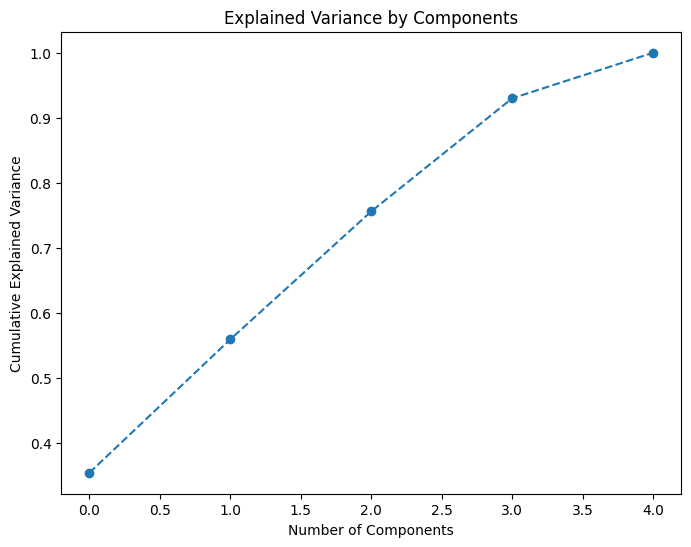

In [127]:
plt.figure(figsize = (8,6))
plt.plot(range(len(segmentation_with_clusters_df.columns)), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [128]:
pca = PCA(n_components = 3)
pca.fit(df_std)
pca.components_

array([[ 0.03643785,  0.64799502,  0.19126259,  0.34430093,  0.65088419],
       [ 0.65367426, -0.1815022 ,  0.62097064,  0.32991252, -0.21288519],
       [-0.75276837, -0.1659283 ,  0.57703444,  0.25234494, -0.09571246]])

The result is a 3 by 5 array. We reduced our futures to three components from the original five values that explain the shape the values themselves show the so-called loadings, which are correlations between an original variable and the component.
For instance, the first value of the array shows the loading of the first feature on the first component.
Let’s put this information in a pandas data frame so that we can see them nicely. Columns are five original features and rows are three components that PCA gave us.

In [129]:
components = ['Component 1', 'Component 2', 'Component 3']
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = segmentation_with_clusters_df.columns,
              index = components)
df_pca_comp

,salary_level,savings_sold,financing_sold,invesment_sold,account_type_sold
Component 1,0.036438,0.647995,0.191263,0.344301,0.650884
Component 2,0.653674,-0.181502,0.620971,0.329913,-0.212885
Component 3,-0.752768,-0.165928,0.577034,0.252345,-0.095712


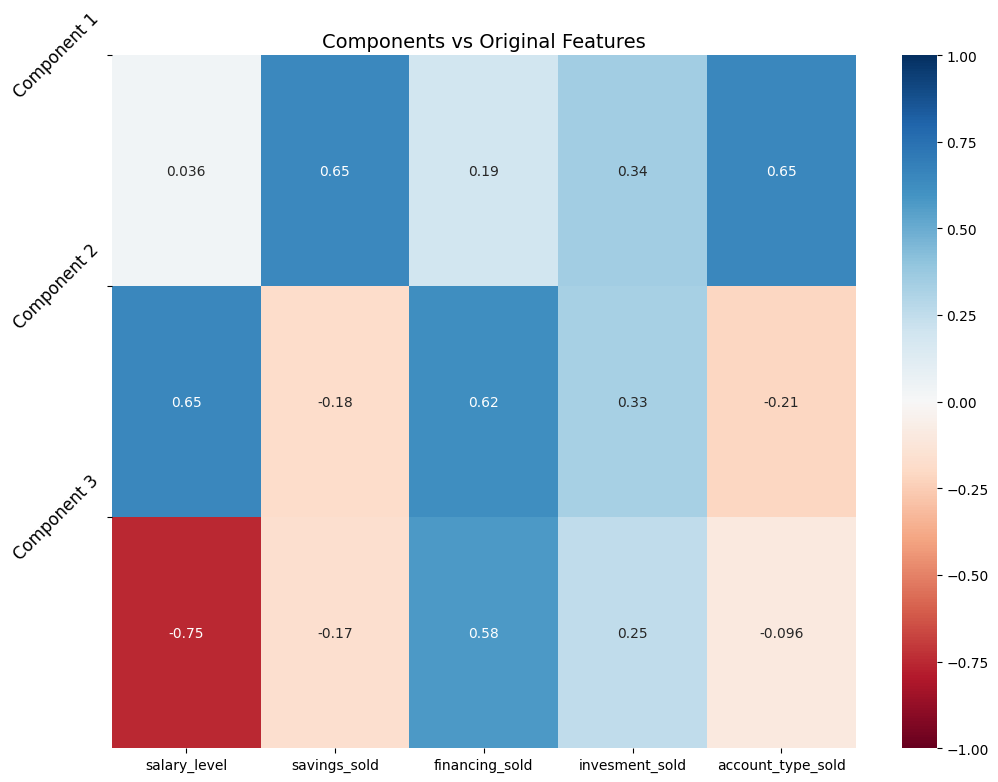

In [130]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           components,
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

We see that there is a positive correlation between Component 1, amount of savings sold and account type sold. This shows that this costumer tends to buy more saving product and account types comparing to the others.

For the second component financing sales and salary level are the most prominent determinants. Such costumers tend to buy more financing products and those are the ones with a higher salary level.

For the final component salary is again by far the determinant, but contratily to the second, the relation is negative, meaning that such clients have the lower salary level.

Now, we have an idea about our new variables(components). We can clearly see the relationship between components and variables.

Let’s transform our data and save it scores_pca.

In [131]:
pca.transform(df_std)
scores_pca = pca.transform(df_std)

In [132]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

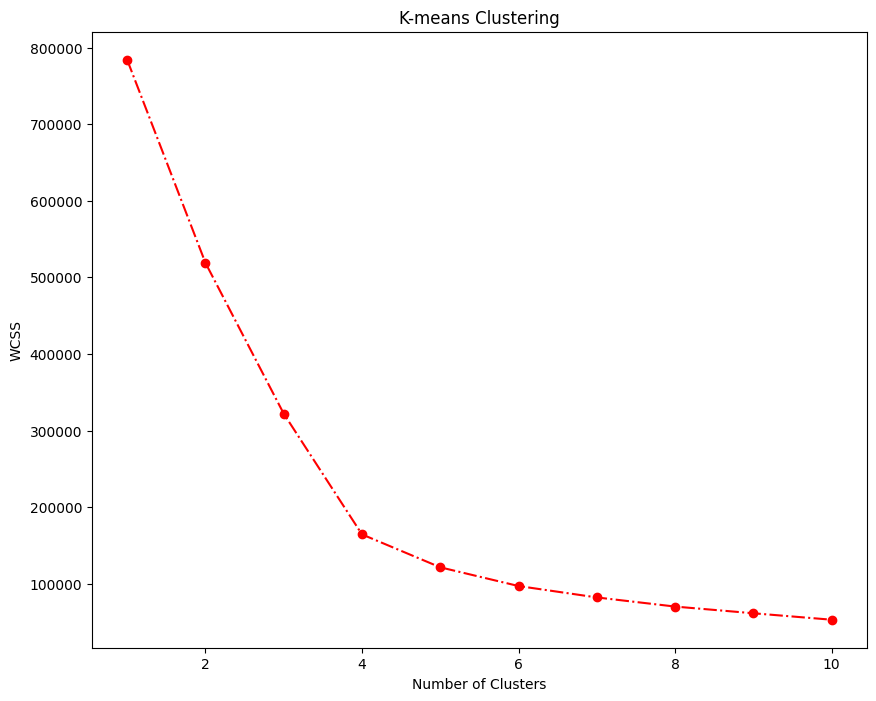

In [133]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

We see that the optimal cluster number by within sum of square is 3.

### 3.2 Segment No Universitários

In [137]:
pca_no_univ = PCA()
pca_no_univ.fit(df_std_no_univ) 
pca_no_univ.explained_variance_ratio_

array([0.3206894 , 0.1841457 , 0.16152774, 0.14296215, 0.12530926,
       0.06536576])

Below one can see a plot that show the percentage of the our data that is explained considering the number of components.
We can see that the first 4 components explains more then 90% of the data.

Text(0, 0.5, 'Cumulative Explained Variance')

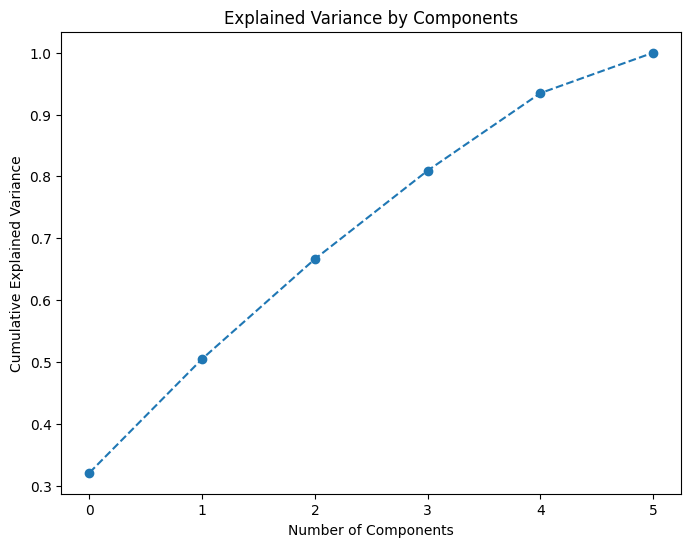

In [138]:
plt.figure(figsize = (8,6))
plt.plot(range(len(segmentation_with_clusters_no_univ_df.columns)), pca_no_univ.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [140]:
pca_no_univ = PCA(n_components = 4)
pca_no_univ.fit(df_std_no_univ)
pca_no_univ.components_

array([[ 0.21990117, -0.36729054,  0.5636383 ,  0.17332485,  0.36600486,
         0.57883671],
       [ 0.70270487, -0.49115588, -0.33498636,  0.24138368, -0.02964039,
        -0.3059596 ],
       [-0.26646349,  0.17426735, -0.08508194,  0.9274301 ,  0.15660841,
        -0.08207547],
       [-0.14224529, -0.05136372, -0.25925847, -0.22675163,  0.8984841 ,
        -0.22632523]])

The result is a 4 by 6 array. We reduced our futures to four components from the original six values that explain the shape the values themselves show the so-called loadings, which are correlations between an original variable and the component.
For instance, the first value of the array shows the loading of the first feature on the first component.
Let’s put this information in a pandas data frame so that we can see them nicely. Columns are six original features and rows are four components that PCA gave us.

In [141]:
components = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
df_pca_no_univ_comp = pd.DataFrame(data = pca_no_univ.components_,
                           columns = segmentation_with_clusters_no_univ_df.columns,
              index = components)
df_pca_no_univ_comp

,salary_level,new_customer,savings_sold,financing_sold,invesment_sold,account_type_sold
Component 1,0.219901,-0.367291,0.563638,0.173325,0.366005,0.578837
Component 2,0.702705,-0.491156,-0.334986,0.241384,-0.029640,-0.305960
Component 3,-0.266463,0.174267,-0.085082,0.927430,0.156608,-0.082075
Component 4,-0.142245,-0.051364,-0.259258,-0.226752,0.898484,-0.226325


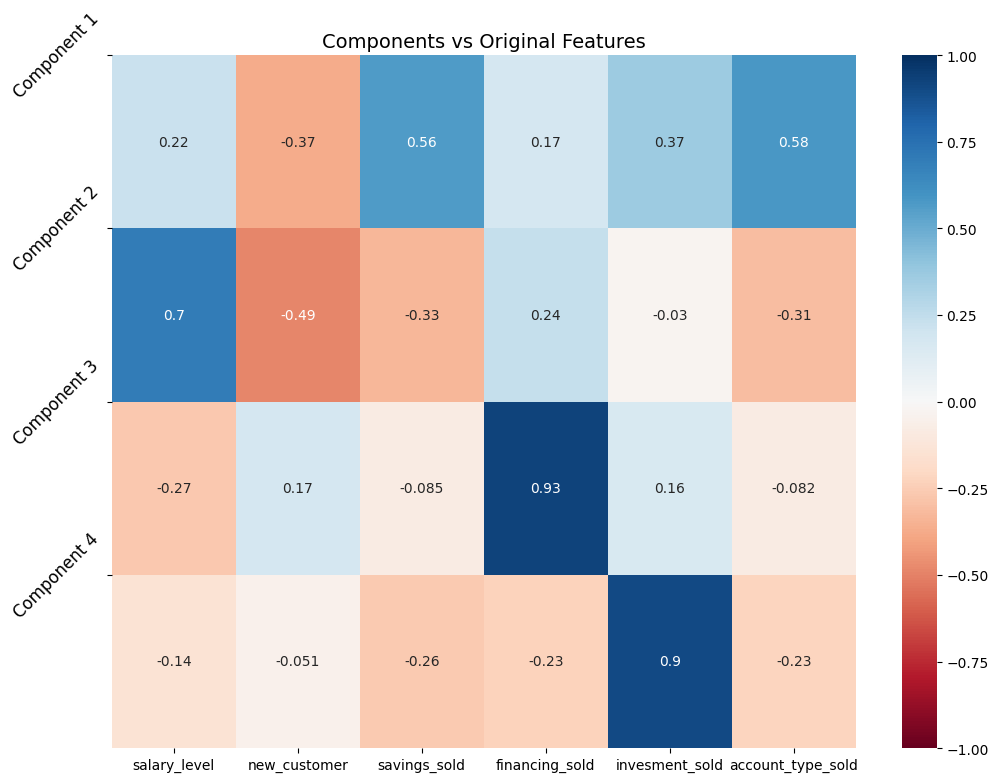

In [142]:
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_no_univ_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3], 
           components,
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

We see that there is a positive correlation between Component 1, amount of savings sold and account type sold. This shows that this customer tends to buy more saving product and account types comparing to the others.

For the second component new_costumer and salary level are the most prominent determinant. Such customers have the higher salaries and most of them are old costumers.

For the third component financing products sold is the most prominent determinants. Such costumers tend to buy more financing products compared to the others.

For the final component investiment products sold is by far the determinant, meaning that such customers  are investment buyers.

Now, we have an idea about our new variables(components). We can clearly see the relationship between components and variables.

Let’s again, transform our data and save it scores_pca.

In [143]:
pca_no_univ.transform(df_std_no_univ)
scores_pca_no_univ = pca_no_univ.transform(df_std_no_univ)

In [144]:
wcss = []
for i in range(1,11):
    kmeans_pca_no_univ = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca_no_univ.fit(scores_pca_no_univ)
    wcss.append(kmeans_pca_no_univ.inertia_)

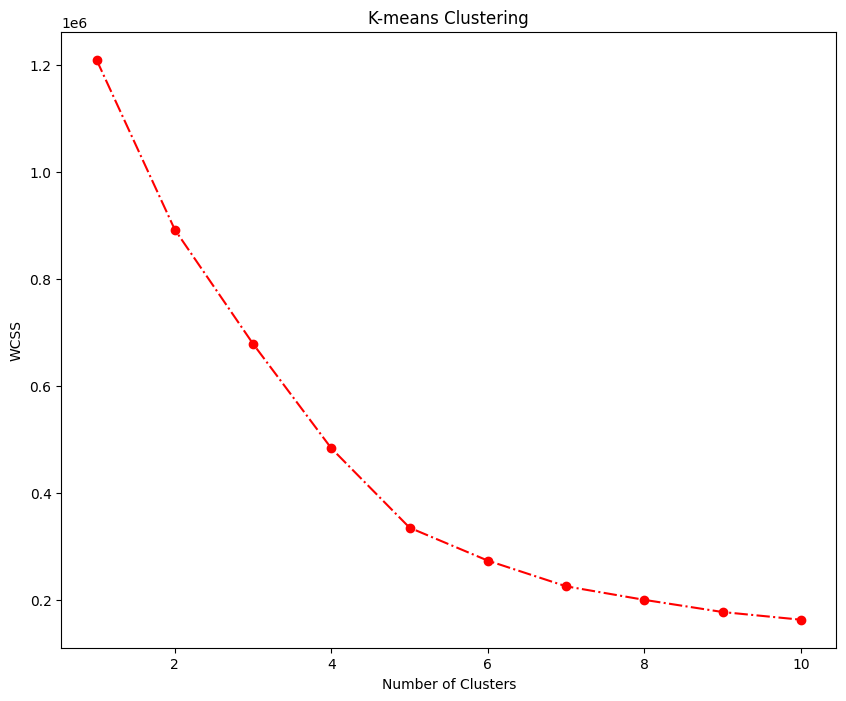

In [145]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

We see that the optimal cluster number by within sum of square is 4.

## 4. Perform K-Means

Now, after PCA, we can perform K-Means algorithm to split the two segments into 3 and 4 clusters, ie, group of clients with similar featrues and/or behaviours.

### 4.1 Segment Universitários

In [146]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [147]:
kmeans.fit(df_std)

KMeans(n_clusters=3, random_state=42)

In [148]:
segmentation_with_clusters_df=segmentation_with_clusters_df.reset_index()
segmentation_with_clusters_df.head()

,pk_cid,salary_level,savings_sold,financing_sold,invesment_sold,account_type_sold
0,46327,0,1,0,4,4
1,84263,1,0,0,0,1
2,346519,1,1,0,3,3
3,386062,1,1,0,0,8
4,396977,0,0,0,3,4


In [149]:
df_segm_kmeans= df_std.copy()
df_std['Segment K-means'] = kmeans.labels_
df_std.head()

,salary_level,savings_sold,financing_sold,invesment_sold,account_type_sold,Segment K-means
0,-0.617496,2.400626,-0.040749,25.609012,2.604222,1
1,1.619444,-0.176979,-0.040749,-0.067974,-0.100918,2
2,1.619444,2.400626,-0.040749,19.189766,1.702508,1
3,1.619444,2.400626,-0.040749,-0.067974,6.211075,1
4,-0.617496,-0.176979,-0.040749,19.189766,2.604222,1


We add to the segmentation set the clusters classification for each client.

In [150]:
segmentation_with_clusters_df_ = segmentation_with_clusters_df.merge(df_std["Segment K-means"], left_index=True, right_index=True)
segmentation_with_clusters_df_.head()

,pk_cid,salary_level,savings_sold,financing_sold,invesment_sold,account_type_sold,Segment K-means
0,46327,0,1,0,4,4,1
1,84263,1,0,0,0,1,2
2,346519,1,1,0,3,3,1
3,386062,1,1,0,0,8,1
4,396977,0,0,0,3,4,1


Let's group by segment K-means to have an overview of the features of the costumers by group.

In [151]:
df_segm_analysis = segmentation_with_clusters_df_.groupby(['Segment K-means']).mean()
df_segm_analysis[features_]

,salary_level,savings_sold,financing_sold,invesment_sold,account_type_sold
Segment K-means,,,,,
0,0.000000,0.008176,0.000275,0.000783,0.987805
1,0.360368,1.709169,0.047938,0.280936,5.235925
2,1.000000,0.014343,0.000695,0.001207,0.900990


From the clusters defined above, one can comment them as:
* **0**: Low salary customers: have low salaries;
* **1**: Buyer customers: 64% have low salary, but are saving and account type buyers;
* **2**: High salary customers: have high salaries.

### 4.2 Segment No Universitários

In [53]:
kmeans_no_univ = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [57]:
kmeans_no_univ.fit(df_std_no_univ)

KMeans(n_clusters=4, random_state=42)

In [58]:
segmentation_with_clusters_no_univ_df=segmentation_with_clusters_no_univ_df.reset_index()
segmentation_with_clusters_no_univ_df.head()

,index,pk_cid,salary_level,new_customer,savings_sold,financing_sold,invesment_sold,account_type_sold
0,0,15891,0,1,0,0,0,1
1,1,16063,0,1,0,0,0,0
2,2,16203,0,1,0,0,0,1
3,3,16502,0,1,0,0,0,2
4,4,17457,0,0,2,0,0,6


In [59]:
df_segm_kmeans_no_univ= df_std_no_univ.copy()
df_std_no_univ['Segment K-means'] = kmeans_no_univ.labels_
df_std_no_univ.head()

,salary_level,new_customer,savings_sold,financing_sold,invesment_sold,account_type_sold,Segment K-means
0,-0.46386,0.791714,-0.324106,-0.107602,-0.149147,-0.204779,0
1,-0.46386,0.791714,-0.324106,-0.107602,-0.149147,-0.877913,0
2,-0.46386,0.791714,-0.324106,-0.107602,-0.149147,-0.204779,0
3,-0.46386,0.791714,-0.324106,-0.107602,-0.149147,0.468355,0
4,-0.46386,-1.263082,3.097379,-0.107602,-0.149147,3.160893,1


We add to the segmentation set the clusters classification for each client.

In [60]:
segmentation_with_clusters_no_univ_df_ = segmentation_with_clusters_no_univ_df.merge(df_std_no_univ["Segment K-means"], left_index=True, right_index=True)
segmentation_with_clusters_no_univ_df_.head()

,index,pk_cid,salary_level,new_customer,savings_sold,financing_sold,invesment_sold,account_type_sold,Segment K-means
0,0,15891,0,1,0,0,0,1,0
1,1,16063,0,1,0,0,0,0,0
2,2,16203,0,1,0,0,0,1,0
3,3,16502,0,1,0,0,0,2,0
4,4,17457,0,0,2,0,0,6,1


Let's group by segment K-means to have an overview of the features of the costumers by group.

In [61]:
df_segm_analysis_no_univ = segmentation_with_clusters_no_univ_df_.groupby(['Segment K-means']).mean()
df_segm_analysis_no_univ[features_no_univ_]

,salary_level,new_customer,savings_sold,financing_sold,invesment_sold,account_type_sold
Segment K-means,,,,,,
0,0.000000,0.705795,0.026028,0.000000,0.005733,0.889123
1,0.157244,0.327295,1.437406,0.000000,0.385127,4.440729
2,0.367954,0.256175,0.596263,1.116846,0.287524,2.402470
3,1.000000,0.400451,0.130129,0.000000,0.023280,1.169288


From the clusters defined above, one can comment them as:
* **0**: Low Salary No Universitario: low salary customer, 70% are new customers and buy too little products;
* **1**: Saving Buyer No Universitario: buy saving and account_type products;
* **2**: Financing Buyer No Universitario: buy financing and account_type products;
* **3**: High Salary No Universitario: high salary customer, 40% are new customers and buy a small amount of products.

__________________
# B. CLUSTERS ANALYSIS 
__________________

After splitting the costumers by segments according segment, salaries, and the type of products bought by them, we made an analysis to have a deep understanding on each group.

We started by attibuting a name for each K-means segment, and saving it on a new variable, Segment Customer:

UNIVERSITARIOS:
* **0**: Low Salary Universitario
* **1**: Buyer Universitario
* **2**: High Salary Universitario

NO UNIVERSITARIOS:
* **0**: Low Salary No Universitario
* **1**: Saving Buyer No Universitario
* **2**: Financing Buyer No Universitario
* **3**: High Salary No Universitario

In [152]:
conditions = [
    (segmentation_with_clusters_df_["Segment K-means"]==0),
    (segmentation_with_clusters_df_["Segment K-means"]==1),
    (segmentation_with_clusters_df_["Segment K-means"]==2)
    ]

cluster_names=["Low Salary Universitario","Buyer Universitario","High Salary Universitario"]

segmentation_with_clusters_df_['Segment Customer'] = np.select(conditions, cluster_names)
segmentation_with_clusters_df_

,pk_cid,salary_level,savings_sold,financing_sold,invesment_sold,account_type_sold,Segment K-means,Segment Customer
0,46327,0,1,0,4,4,1,Buyer Universitario
1,84263,1,0,0,0,1,2,High Salary Universitario
2,346519,1,1,0,3,3,1,Buyer Universitario
3,386062,1,1,0,0,8,1,Buyer Universitario
4,396977,0,0,0,3,4,1,Buyer Universitario
...,...,...,...,...,...,...,...,...
207378,1440519,0,0,0,0,1,0,Low Salary Universitario
207379,1440521,0,0,0,0,1,0,Low Salary Universitario
207380,1440525,0,0,0,0,1,0,Low Salary Universitario
207381,1440528,0,0,0,0,1,0,Low Salary Universitario


In [153]:
conditions_no = [
    (segmentation_with_clusters_no_univ_df_["Segment K-means"]==0),
    (segmentation_with_clusters_no_univ_df_["Segment K-means"]==1),
    (segmentation_with_clusters_no_univ_df_["Segment K-means"]==2),
    (segmentation_with_clusters_no_univ_df_["Segment K-means"]==3)
    ]

cluster_names_no=["Low Salary No Universitario","Saving Buyer No Universitario","Financing Buyer No Universitario","High Salary No Universitario"]

segmentation_with_clusters_no_univ_df_['Segment Customer'] = np.select(conditions_no, cluster_names_no)
segmentation_with_clusters_no_univ_df_

,index,pk_cid,salary_level,new_customer,savings_sold,financing_sold,invesment_sold,account_type_sold,Segment K-means,Segment Customer
0,0,15891,0,1,0,0,0,1,0,Low Salary No Universitario
1,1,16063,0,1,0,0,0,0,0,Low Salary No Universitario
2,2,16203,0,1,0,0,0,1,0,Low Salary No Universitario
3,3,16502,0,1,0,0,0,2,0,Low Salary No Universitario
4,4,17457,0,0,2,0,0,6,1,Saving Buyer No Universitario
...,...,...,...,...,...,...,...,...,...,...
248985,248985,1553685,0,1,0,0,0,0,0,Low Salary No Universitario
248986,248986,1553686,0,1,0,0,0,0,0,Low Salary No Universitario
248987,248987,1553687,0,1,0,0,0,0,0,Low Salary No Universitario
248988,248988,1553688,0,1,0,0,0,0,0,Low Salary No Universitario


And it's time to merge the 2 datasets with the segmentation dataset.

In [154]:
segmentation_with_segment_customer_df=segmentation_df.merge(segmentation_with_clusters_df_[["pk_cid","Segment Customer"]], on=['pk_cid'])

In [155]:
segmentation_with_segment_customer_no_univ_df=segmentation_df.merge(segmentation_with_clusters_no_univ_df_[["pk_cid","Segment Customer"]], on=['pk_cid'])

Let's have a look on the the percentagens of costumers among each 2 "main groups": Universitarios and No universitarios.

In [156]:
n_costumers = segmentation_with_clusters_df_.shape[0]
for i in [0,1,2]:
    print(f'Percentage of customers in cluster {i}: {round(segmentation_with_clusters_df_[segmentation_with_clusters_df_["Segment K-means"]==i].shape[0]/n_costumers*100,2)}')

Percentage of customers in cluster 0: 70.18
Percentage of customers in cluster 1: 3.46
Percentage of customers in cluster 2: 26.36


In [157]:
n_costumers = segmentation_with_clusters_no_univ_df_.shape[0]
for i in [0,1,2,3]:
    print(f'Percentage of customers in cluster {i}: {round(segmentation_with_clusters_no_univ_df_[segmentation_with_clusters_no_univ_df_["Segment K-means"]==i].shape[0]/n_costumers*100,2)}')

Percentage of customers in cluster 0: 73.14
Percentage of customers in cluster 1: 9.91
Percentage of customers in cluster 2: 1.27
Percentage of customers in cluster 3: 15.68


In [158]:
sales_cols_0=['sale_long_term_deposit','sale_pension_plan','sale_short_term_deposit','sale_funds','sale_securities','sale_credit_card',
              'sale_loans','sale_mortgage','sale_debit_card','sale_em_acount','sale_emc_account', 'sale_payroll','sale_payroll_account','sale_em_account_p']
churn_cols_0=['churn_long_term_deposit','churn_pension_plan','churn_short_term_deposit','churn_funds','churn_securities','churn_credit_card',
              'churn_loans','churn_mortgage','churn_debit_card','churn_em_acount','churn_emc_account', 'churn_payroll','churn_payroll_account','churn_em_account_p']

## 1. Clusters Universitários

In [69]:
customers_cluster=segmentation_with_segment_customer_df[['pk_cid','age','new_customer','salary','salary_level',
                                                           'active_customer','gender','Segment Customer']].groupby("pk_cid").max()

Let's have a look on the statistics for Universitarios:

In [70]:
customers_cluster[customers_cluster["Segment Customer"]=="High Salary Universitario"].describe()

,age,new_customer,salary,salary_level,active_customer,gender
count,54661.000000,54661.000000,5.466100e+04,54661.0,54661.000000,54661.000000
mean,24.266076,0.009952,2.087859e+05,1.0,0.268436,0.539599
std,2.734040,0.099264,3.279591e+05,0.0,0.443150,0.498434
min,20.000000,0.000000,1.134629e+05,1.0,0.000000,0.000000
25%,22.000000,0.000000,1.316910e+05,1.0,0.000000,0.000000
50%,24.000000,0.000000,1.606437e+05,1.0,0.000000,1.000000
75%,26.000000,0.000000,2.168798e+05,1.0,1.000000,1.000000
max,77.000000,1.000000,2.889440e+07,1.0,1.000000,1.000000


As expected, the level of salaries of most of such costumers tends to be high. The average age is low, must of them are no active customers (in mean), and most of them are old clients.

In [71]:
customers_cluster[customers_cluster["Segment Customer"]=="Low Salary Universitario"].describe()

,age,new_customer,salary,salary_level,active_customer,gender
count,145546.000000,145546.000000,145546.000000,145546.0,145546.000000,145546.000000
mean,24.327587,0.007730,52127.287013,0.0,0.278544,0.579219
std,2.763451,0.087578,36443.021283,0.0,0.448284,0.493686
min,20.000000,0.000000,-1.000000,0.0,0.000000,0.000000
25%,22.000000,0.000000,-1.000000,0.0,0.000000,0.000000
50%,24.000000,0.000000,57965.040000,0.0,0.000000,1.000000
75%,26.000000,0.000000,81370.995000,0.0,1.000000,1.000000
max,63.000000,1.000000,113460.900000,0.0,1.000000,1.000000


As expected, the level of salaries of most of such costumers tends to be low. The average age is low, must of them are no active customers (in mean), and most of them are old clients.

In [72]:
customers_cluster[customers_cluster["Segment Customer"]=="Buyer Universitario"].describe()

,age,new_customer,salary,salary_level,active_customer,gender
count,7176.000000,7176.000000,7.176000e+03,7176.000000,7176.000000,7176.000000
mean,27.420569,0.048634,1.139195e+05,0.360368,0.994844,0.492196
std,4.042436,0.215117,1.407342e+05,0.480141,0.071625,0.499974
min,21.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,24.000000,0.000000,5.330888e+04,0.000000,1.000000,0.000000
50%,27.000000,0.000000,8.891648e+04,0.000000,1.000000,0.000000
75%,31.000000,0.000000,1.412777e+05,1.000000,1.000000,1.000000
max,71.000000,1.000000,4.347328e+06,1.000000,1.000000,1.000000


For the Buyer Universitarios, the average age quite higher then the other 2 groups, most of them are active customers (in mean), and 36% have a high level salary.

Text(0.5, 1.0, 'Salary level')

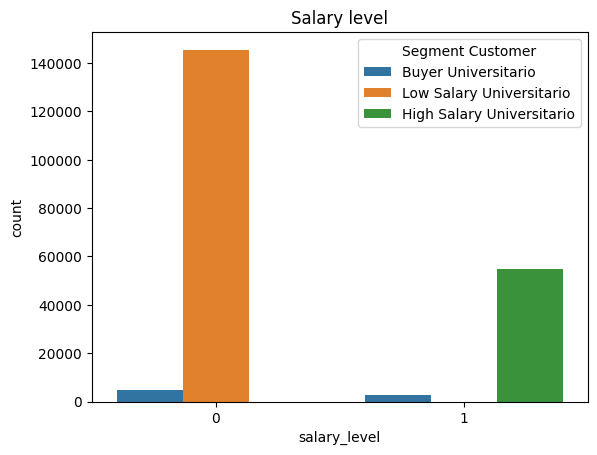

In [159]:
sns.countplot(data=customers_cluster, x="salary_level",hue="Segment Customer").set_title("Salary level")

The plot above just confirm what we said before.

In [160]:
customers_sales_cluster__=segmentation_with_segment_customer_df[['pk_cid','sale_long_term_deposit','sale_pension_plan','sale_short_term_deposit','sale_funds','sale_securities','sale_credit_card',
              'sale_loans','sale_mortgage','sale_debit_card','sale_em_acount','sale_emc_account', 'sale_payroll','sale_payroll_account','sale_em_account_p','Segment Customer']].groupby("pk_cid").agg({ 
                                                                "sale_long_term_deposit": 'sum',
                                                                "sale_pension_plan": 'sum',
                                                                "sale_short_term_deposit": 'sum',
                                                                "sale_funds": 'sum',
                                                                "sale_securities": 'sum',
                                                                "sale_credit_card": 'sum',
                                                                "sale_loans": 'sum',
                                                                "sale_mortgage": 'sum',
                                                                "sale_debit_card": 'sum',
                                                                "sale_em_acount": 'sum',
                                                                "sale_emc_account": 'sum',
                                                                "sale_payroll": 'sum',
                                                                "sale_payroll_account": 'sum',
                                                                "sale_em_account_p": 'sum',
                                                                "Segment Customer": 'max'
                                                                })

customers_churn_cluster__=segmentation_with_segment_customer_df[['pk_cid','churn_long_term_deposit','churn_pension_plan','churn_short_term_deposit','churn_funds','churn_securities','churn_credit_card',
              'churn_loans','churn_mortgage','churn_debit_card','churn_em_acount','churn_emc_account', 'churn_payroll','churn_payroll_account','churn_em_account_p','Segment Customer']].groupby("pk_cid").agg({ 
                                                                "churn_long_term_deposit": 'sum',
                                                                "churn_pension_plan": 'sum',
                                                                "churn_short_term_deposit": 'sum',
                                                                "churn_funds": 'sum',
                                                                "churn_securities": 'sum',
                                                                "churn_credit_card": 'sum',
                                                                "churn_loans": 'sum',
                                                                "churn_mortgage": 'sum',
                                                                "churn_debit_card": 'sum',
                                                                "churn_em_acount": 'sum',
                                                                "churn_emc_account": 'sum',
                                                                "churn_payroll": 'sum',
                                                                "churn_payroll_account": 'sum',
                                                                "churn_em_account_p": 'sum',
                                                                "Segment Customer": 'max'
                                                                })

It is interesting to check, in terms os proportion among each group costumers, the percentage of costumers that bought/stopped using 0, 1, 2... products, by each product.
Below we can see such plots.

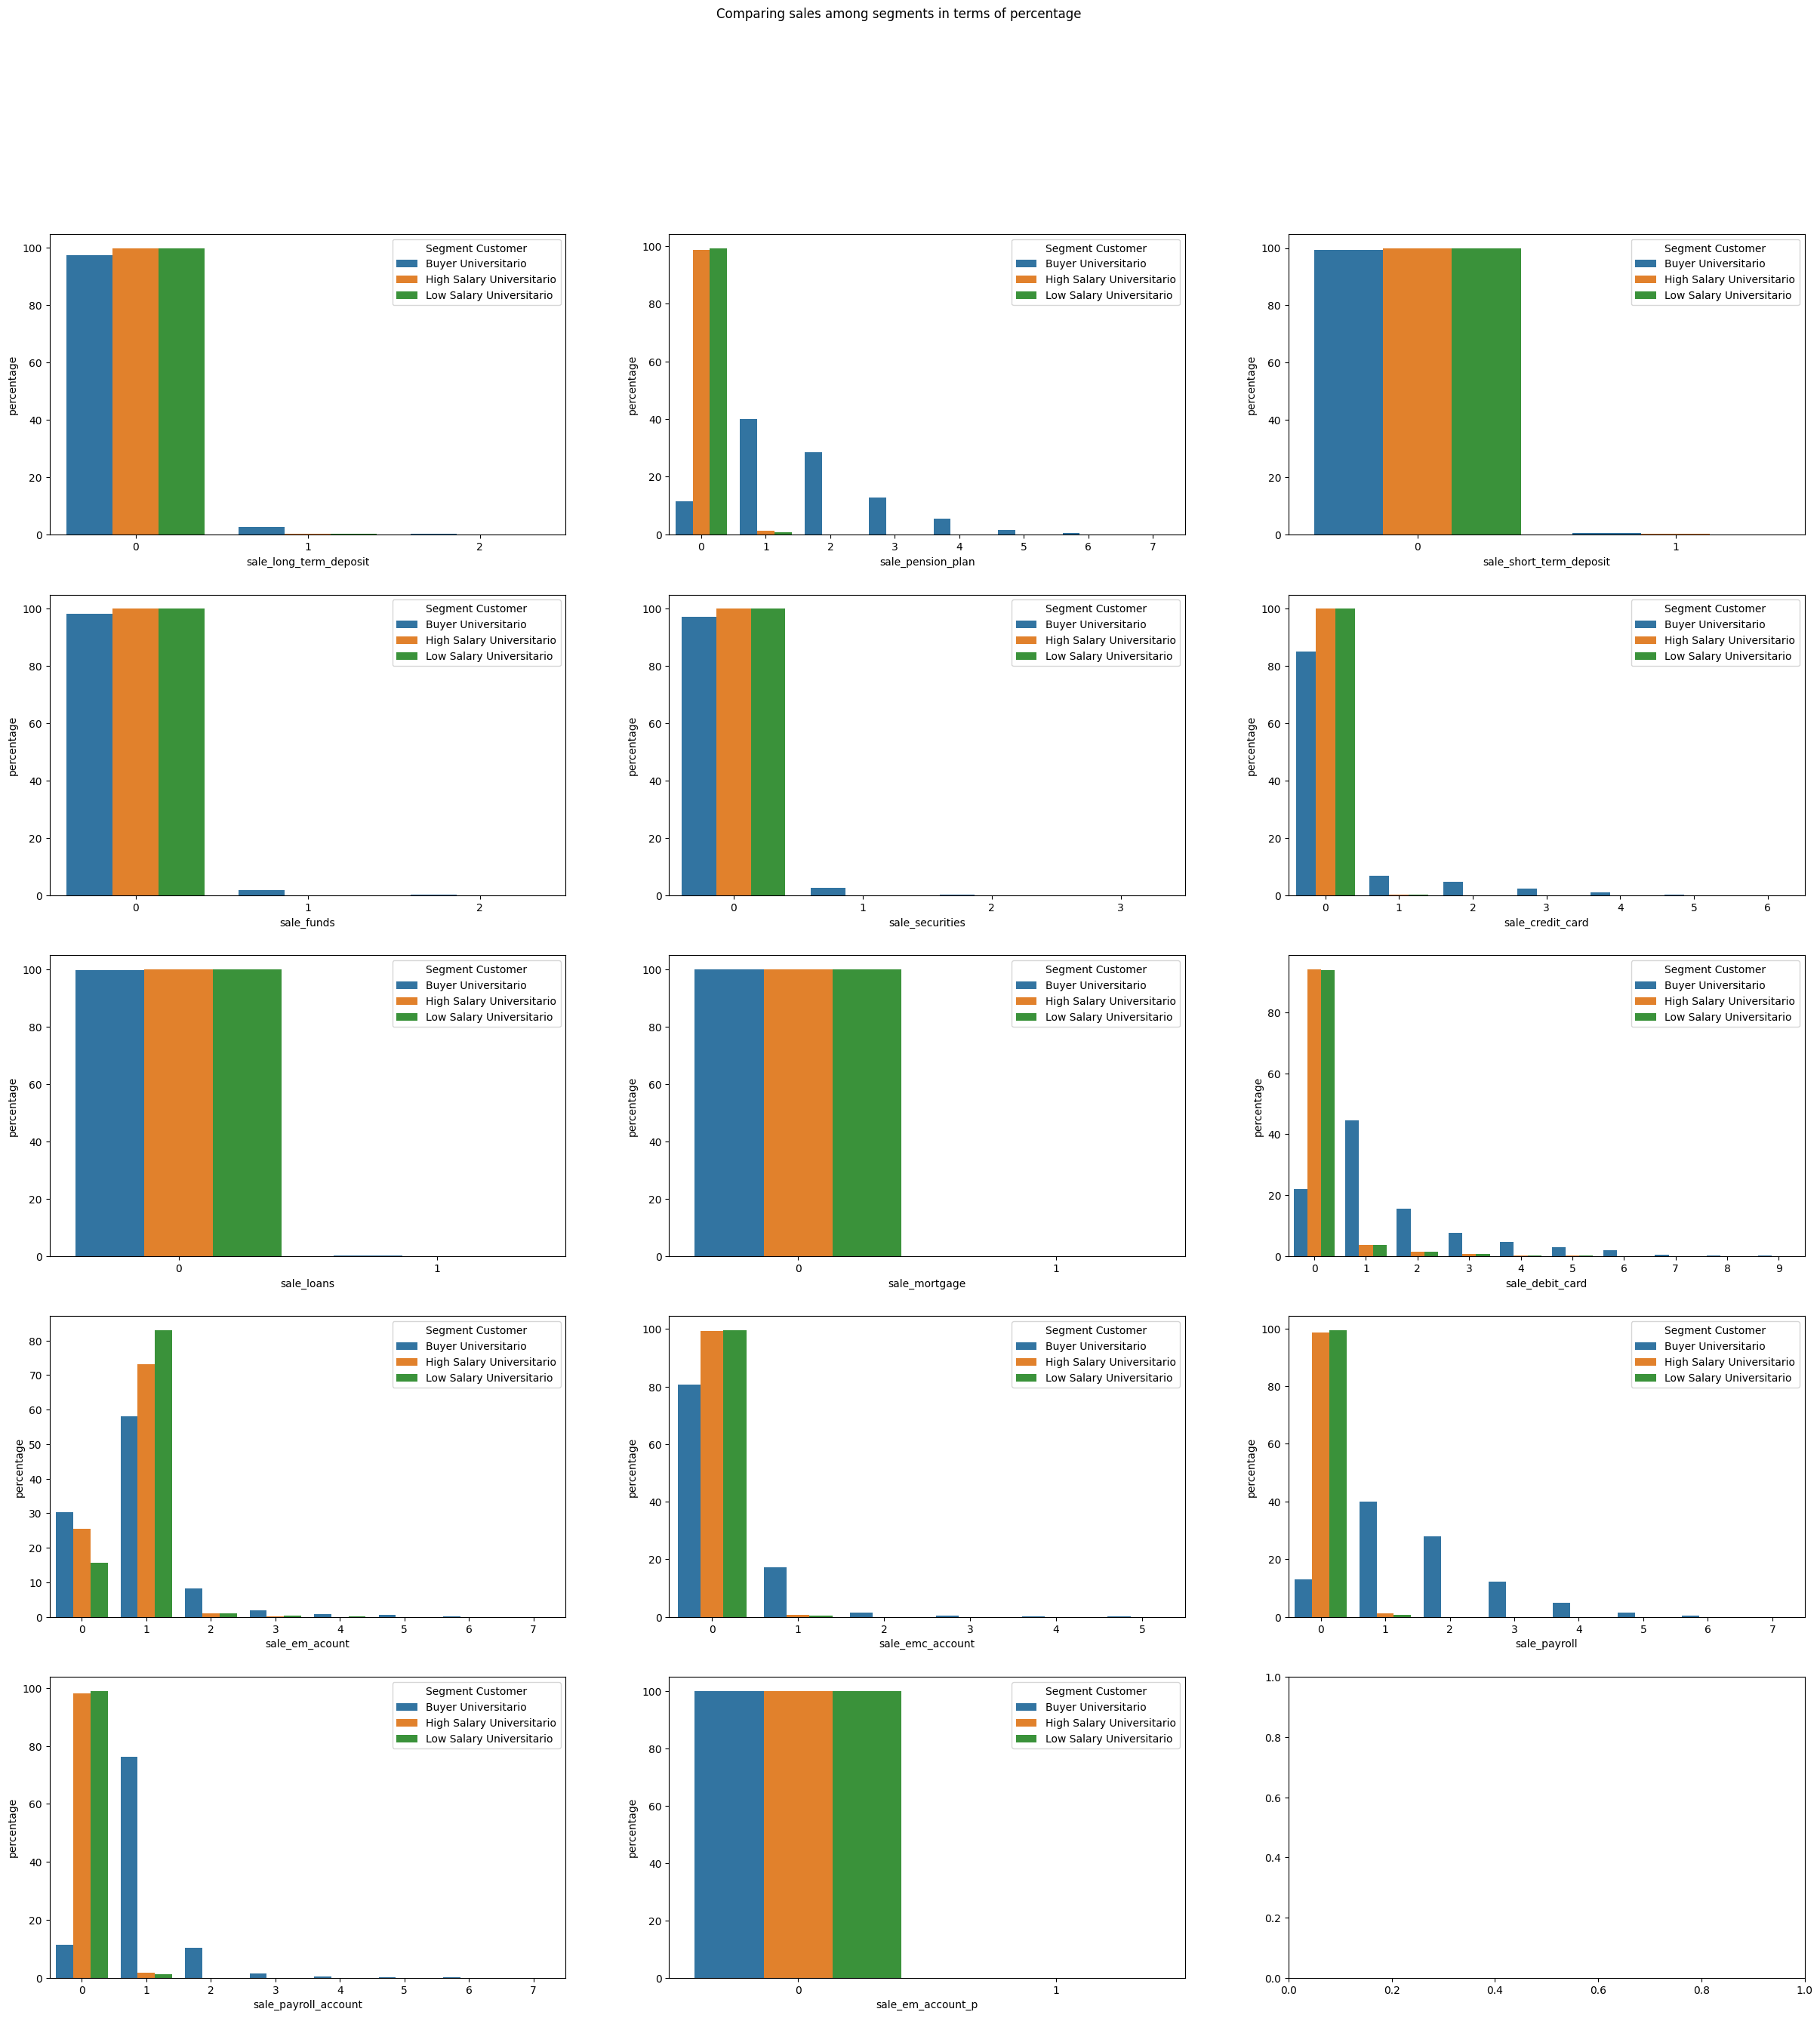

In [75]:
def get_percentages_by_segment(df,sales_cols_0,title):

    fig, axes = plt.subplots(5, 3)
    fig.suptitle(title)
    fig.set_size_inches(30,30)
    
    k=0
    for dx in [0,1,2,3,4]:
        for idx, sale in enumerate(sales_cols_0[k:3+k]):
            customers_percentages_by_segment=df.reset_index()[["pk_cid","Segment Customer",sale]].groupby(["Segment Customer",sale]).count()
            customers_percentages_by_segment=customers_percentages_by_segment.reset_index()

            buyer_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Buyer Universitario"]
            buyer_percentages["percentage"]=round(buyer_percentages["pk_cid"]/buyer_percentages["pk_cid"].sum()*100,1)

            high_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="High Salary Universitario"]
            high_percentages["percentage"]=round(high_percentages["pk_cid"]/high_percentages["pk_cid"].sum()*100,1)

            low_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Low Salary Universitario"]
            low_percentages["percentage"]=round(low_percentages["pk_cid"]/low_percentages["pk_cid"].sum()*100,1)

            all_percentages=pd.concat([buyer_percentages,high_percentages,low_percentages])
            sns.barplot(all_percentages, x=sale, y="percentage", hue="Segment Customer", legend=True, ax=axes[dx][idx])

        k+=3

get_percentages_by_segment(customers_sales_cluster__,sales_cols_0,"Comparing sales among segments in terms of percentage")

By looking for the plots, we can see that for most of the products, the Buyer Universitario have a higher percentage of costumers that bought more then one product.
It's very clear for debit cards, pension plan and payrol that the percentage of Buyer Universitarios that bought more than one of such products is higher when compared to the other segments.
The behaviour for Low and High salary universitarios is not so different, but, in general, the percentage of customers with high salary that bought more than 1 product (as payroll account, payroll...) is stricly higher compared to the low salary.

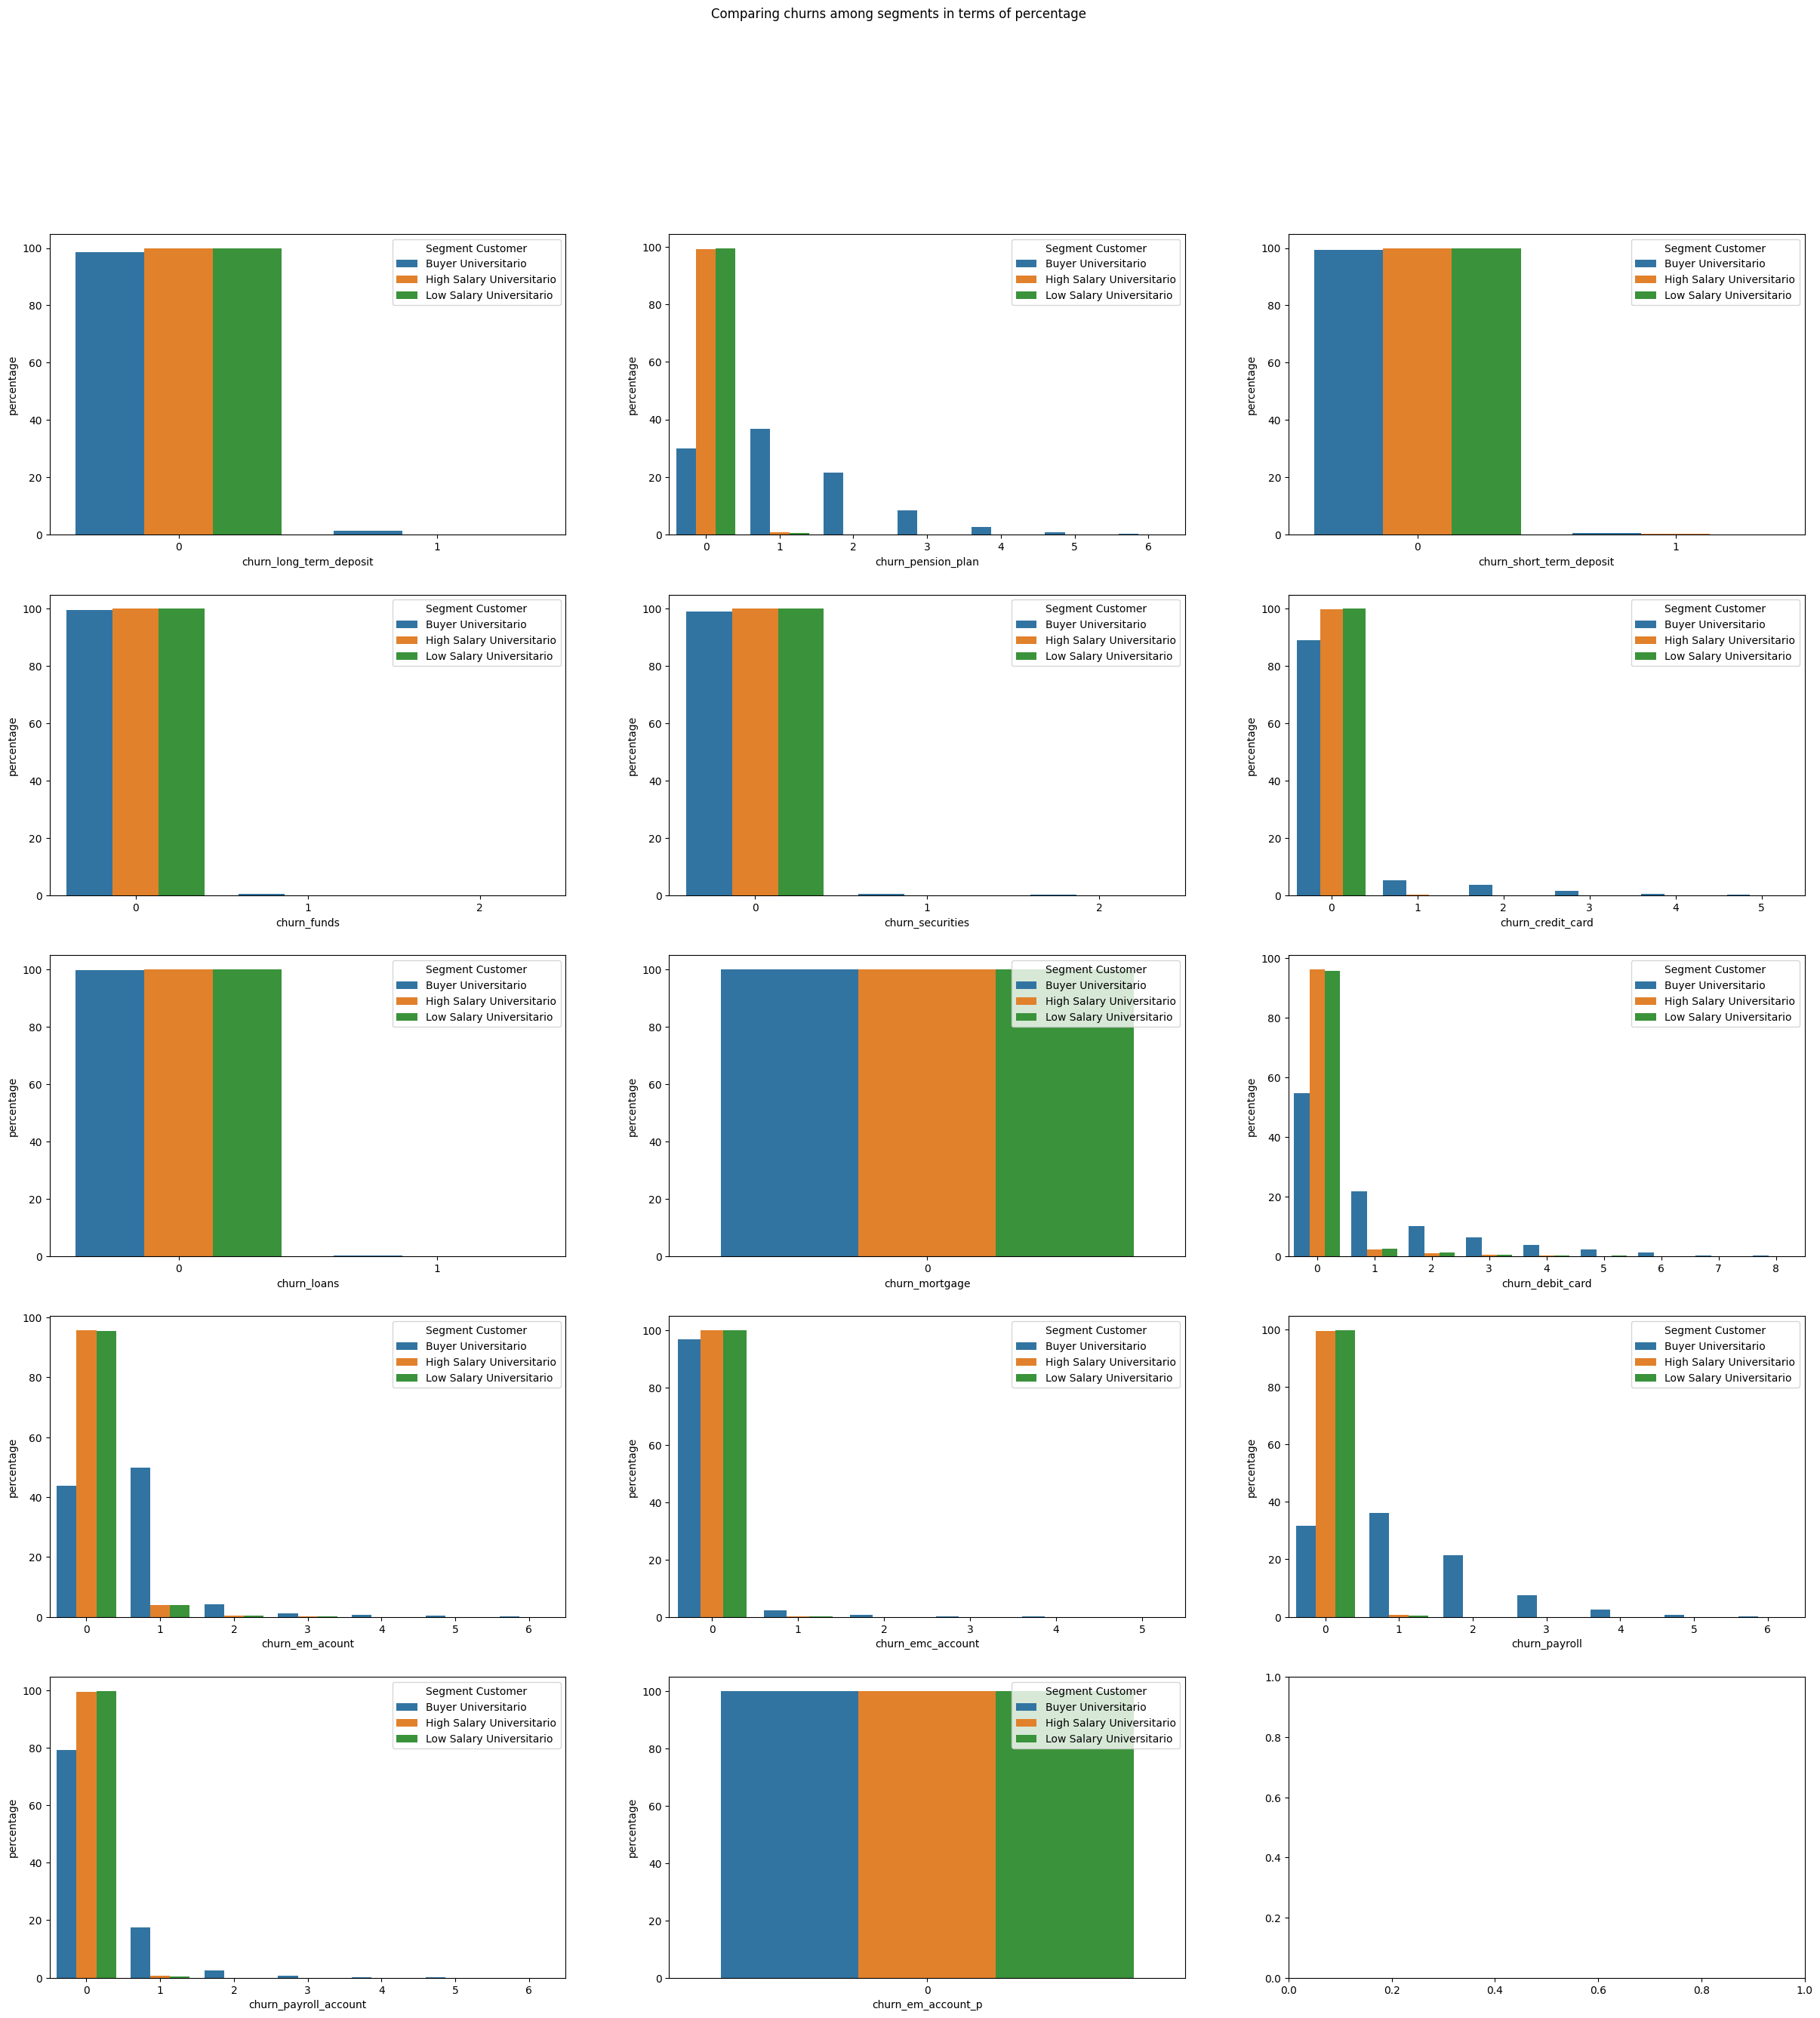

In [161]:
def get_percentages_by_segment(df,sales_cols_0,title):

    fig, axes = plt.subplots(5, 3)
    fig.suptitle(title)
    fig.set_size_inches(30,30)
    
    k=0
    for dx in [0,1,2,3,4]:
        for idx, sale in enumerate(sales_cols_0[k:3+k]):
            customers_percentages_by_segment=df.reset_index()[["pk_cid","Segment Customer",sale]].groupby(["Segment Customer",sale]).count()
            customers_percentages_by_segment=customers_percentages_by_segment.reset_index()

            buyer_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Buyer Universitario"]
            buyer_percentages["percentage"]=round(buyer_percentages["pk_cid"]/buyer_percentages["pk_cid"].sum()*100,1)

            high_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="High Salary Universitario"]
            high_percentages["percentage"]=round(high_percentages["pk_cid"]/high_percentages["pk_cid"].sum()*100,1)

            low_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Low Salary Universitario"]
            low_percentages["percentage"]=round(low_percentages["pk_cid"]/low_percentages["pk_cid"].sum()*100,1)

            all_percentages=pd.concat([buyer_percentages,high_percentages,low_percentages])
            sns.barplot(all_percentages, x=sale, y="percentage", hue="Segment Customer", legend=True, ax=axes[dx][idx])

        k+=3

get_percentages_by_segment(customers_churn_cluster__,churn_cols_0,"Comparing churns among segments in terms of percentage")

Regarding the churn rate, the trend is similiar to the trend seen in the sales: the costumers with higher churn rate are the Buyers Universitarios.

## 2. Clusters No Universitários

In [162]:
customers_cluster_no=segmentation_with_segment_customer_no_univ_df[['pk_cid','age','new_customer','salary','salary_level',
                                                           'active_customer','gender','Segment Customer']].groupby("pk_cid").max()

Let's have a look on the statistics for No universitarios:

In [79]:
customers_cluster_no[customers_cluster_no["Segment Customer"]=="Low Salary No Universitario"].describe()

,age,new_customer,salary,salary_level,active_customer,gender
count,182111.000000,182111.000000,182111.000000,182111.0,182111.000000,182111.000000
mean,34.080116,0.705795,27442.728170,0.0,0.465771,0.475880
std,14.124401,0.455686,37230.494736,0.0,0.498828,0.499441
min,2.000000,0.000000,-1.000000,0.0,0.000000,-1.000000
25%,21.000000,0.000000,-1.000000,0.0,0.000000,0.000000
50%,32.000000,1.000000,-1.000000,0.0,0.000000,0.000000
75%,42.000000,1.000000,60624.525000,0.0,1.000000,1.000000
max,104.000000,1.000000,113462.190000,0.0,1.000000,1.000000


For the Low Salary No Universitarios, the salary level tends to be low, as expected. The percentage of new customers is around 70% and the mean age is 34 (higher than universitarios)

In [163]:
customers_cluster_no[customers_cluster_no["Segment Customer"]=="High Salary No Universitario"].describe()

,age,new_customer,salary,salary_level,active_customer,gender
count,39046.000000,39046.000000,3.904600e+04,39046.0,39046.000000,39046.000000
mean,38.728961,0.400451,2.061299e+05,1.0,0.587077,0.464170
std,16.093973,0.489996,3.604966e+05,0.0,0.492366,0.498721
min,2.000000,0.000000,1.134629e+05,1.0,0.000000,0.000000
25%,24.000000,0.000000,1.311887e+05,1.0,0.000000,0.000000
50%,37.000000,0.000000,1.586040e+05,1.0,1.000000,0.000000
75%,48.000000,1.000000,2.105793e+05,1.0,1.000000,1.000000
max,105.000000,1.000000,2.889440e+07,1.0,1.000000,1.000000


For the High Salary No Universitarios, the salary level tends to be high, as expected. The percentage of new customers is around 40% and the mean age is 38 (higher than low salary no universitarios)

In [164]:
customers_cluster_no[customers_cluster_no["Segment Customer"]=="Financing Buyer No Universitario"].describe()

,age,new_customer,salary,salary_level,active_customer,gender
count,3158.000000,3158.000000,3.158000e+03,3158.000000,3158.000000,3158.000000
mean,48.746042,0.256175,1.045581e+05,0.367954,0.989867,0.342622
std,13.968950,0.436589,1.157627e+05,0.482325,0.100167,0.474661
min,20.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,0.000000,3.238240e+04,0.000000,1.000000,0.000000
50%,46.500000,0.000000,8.741214e+04,0.000000,1.000000,0.000000
75%,57.000000,1.000000,1.426409e+05,1.000000,1.000000,1.000000
max,101.000000,1.000000,2.563288e+06,1.000000,1.000000,1.000000


For the Financing Buyer No Universitarios, 37% have a high salary level. The percentage of new customers is around 26% and the mean age is 49 (higher than low and high salary no universitarios)

In [82]:
customers_cluster_no[customers_cluster_no["Segment Customer"]=="Saving Buyer No Universitario"].describe()

,age,new_customer,salary,salary_level,active_customer,gender
count,24675.000000,24675.000000,2.467500e+04,24675.000000,24675.000000,24675.000000
mean,41.776535,0.327295,7.125964e+04,0.157244,0.993191,0.432057
std,12.248841,0.469235,1.405721e+05,0.364038,0.082234,0.495372
min,4.000000,0.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,34.000000,0.000000,-1.000000e+00,0.000000,1.000000,0.000000
50%,39.000000,0.000000,6.276933e+04,0.000000,1.000000,0.000000
75%,48.000000,1.000000,9.612078e+04,0.000000,1.000000,1.000000
max,102.000000,1.000000,1.326862e+07,1.000000,1.000000,1.000000


For the Saving Buyer No Universitarios, 16% have a high salary level. The percentage of new customers is around 32%, almost 100% are very active customers and the mean age is 41.

Text(0.5, 1.0, 'Salary level')

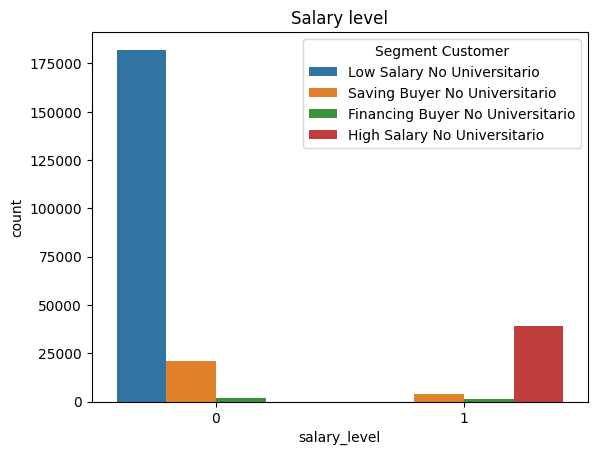

In [165]:
sns.countplot(data=customers_cluster_no, x="salary_level",hue="Segment Customer").set_title("Salary level")

Again, let's check, in terms os proportion among each group costumers, the percentage of costumers that bought/stopped using 0, 1, 2... products, by each product.
Below we can see such plots.

In [166]:
customers_sales_cluster_no__=segmentation_with_segment_customer_no_univ_df[['pk_cid','sale_long_term_deposit','sale_pension_plan','sale_short_term_deposit','sale_funds','sale_securities','sale_credit_card',
              'sale_loans','sale_mortgage','sale_debit_card','sale_em_acount','sale_emc_account', 'sale_payroll','sale_payroll_account','sale_em_account_p','Segment Customer']].groupby("pk_cid").agg({ 
                                                                "sale_long_term_deposit": 'sum',
                                                                "sale_pension_plan": 'sum',
                                                                "sale_short_term_deposit": 'sum',
                                                                "sale_funds": 'sum',
                                                                "sale_securities": 'sum',
                                                                "sale_credit_card": 'sum',
                                                                "sale_loans": 'sum',
                                                                "sale_mortgage": 'sum',
                                                                "sale_debit_card": 'sum',
                                                                "sale_em_acount": 'sum',
                                                                "sale_emc_account": 'sum',
                                                                "sale_payroll": 'sum',
                                                                "sale_payroll_account": 'sum',
                                                                "sale_em_account_p": 'sum',
                                                                "Segment Customer": 'max'
                                                                })

customers_churn_cluster_no__=segmentation_with_segment_customer_no_univ_df[['pk_cid','churn_long_term_deposit','churn_pension_plan','churn_short_term_deposit','churn_funds','churn_securities','churn_credit_card',
              'churn_loans','churn_mortgage','churn_debit_card','churn_em_acount','churn_emc_account', 'churn_payroll','churn_payroll_account','churn_em_account_p','Segment Customer']].groupby("pk_cid").agg({ 
                                                                "churn_long_term_deposit": 'sum',
                                                                "churn_pension_plan": 'sum',
                                                                "churn_short_term_deposit": 'sum',
                                                                "churn_funds": 'sum',
                                                                "churn_securities": 'sum',
                                                                "churn_credit_card": 'sum',
                                                                "churn_loans": 'sum',
                                                                "churn_mortgage": 'sum',
                                                                "churn_debit_card": 'sum',
                                                                "churn_em_acount": 'sum',
                                                                "churn_emc_account": 'sum',
                                                                "churn_payroll": 'sum',
                                                                "churn_payroll_account": 'sum',
                                                                "churn_em_account_p": 'sum',
                                                                "Segment Customer": 'max'
                                                                })

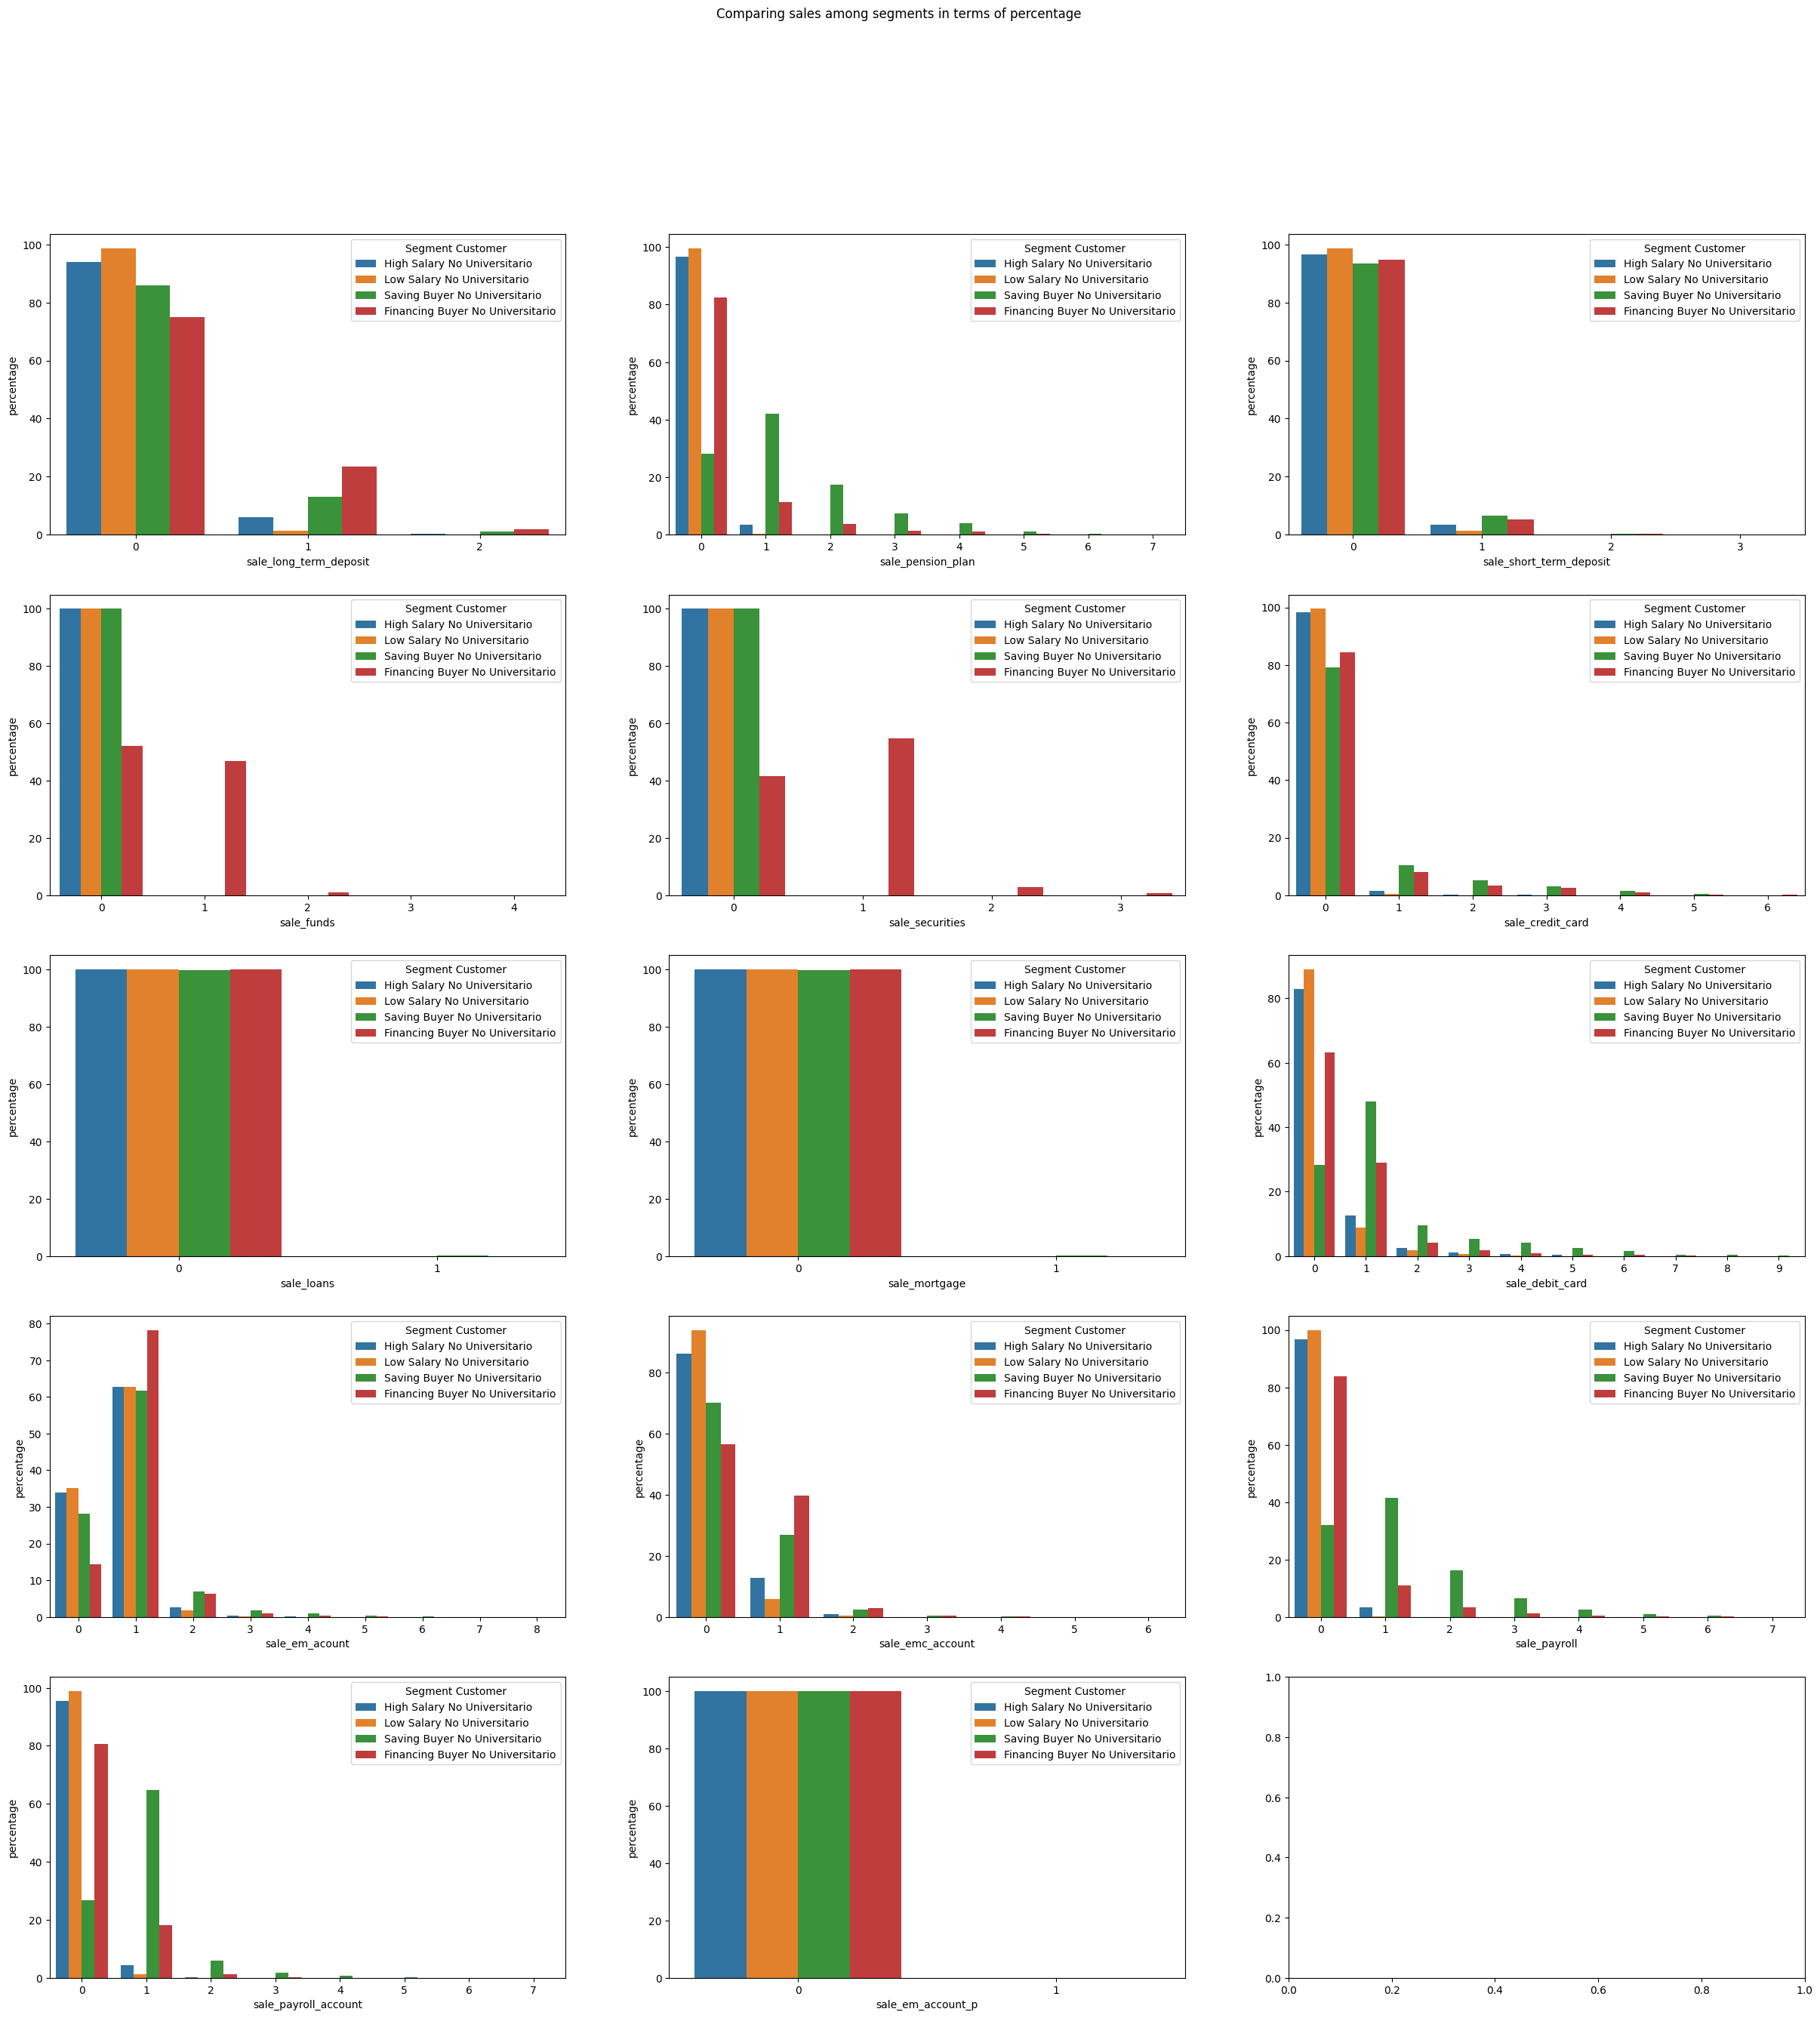

In [85]:
def get_percentages_by_segment(df,sales_cols_0,title):

    fig, axes = plt.subplots(5, 3)
    fig.suptitle(title)
    fig.set_size_inches(30,30)
    
    k=0
    for dx in [0,1,2,3,4]:
        for idx, sale in enumerate(sales_cols_0[k:3+k]):
            customers_percentages_by_segment=df.reset_index()[["pk_cid","Segment Customer",sale]].groupby(["Segment Customer",sale]).count()
            customers_percentages_by_segment=customers_percentages_by_segment.reset_index()

            high_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="High Salary No Universitario"]
            high_percentages["percentage"]=round(high_percentages["pk_cid"]/high_percentages["pk_cid"].sum()*100,1)

            low_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Low Salary No Universitario"]
            low_percentages["percentage"]=round(low_percentages["pk_cid"]/low_percentages["pk_cid"].sum()*100,1)

            sav_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Saving Buyer No Universitario"]
            sav_percentages["percentage"]=round(sav_percentages["pk_cid"]/sav_percentages["pk_cid"].sum()*100,1)

            fin_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Financing Buyer No Universitario"]
            fin_percentages["percentage"]=round(fin_percentages["pk_cid"]/fin_percentages["pk_cid"].sum()*100,1)

            all_percentages=pd.concat([high_percentages,low_percentages,sav_percentages,fin_percentages])
            sns.barplot(all_percentages, x=sale, y="percentage", hue="Segment Customer", legend=True, ax=axes[dx][idx])

        k+=3

get_percentages_by_segment(customers_sales_cluster_no__,sales_cols_0,"Comparing sales among segments in terms of percentage")

Comparing between the low and high salary customers groups, one can say that the trend is similar to the observed in the groups of Low/High Universitarios.

Regarding the Saving Buyer No Universitarios, as expected, the percentage of costumers which buy saving products is high, espacially for pension plans, having more than 40% buying 1 pension plan and almost 20% buying 2 of such products. Those costumers also tend to buy payroll accounts and payrolls.

Regarding the Financing Buyer No Universitarios, as expected, the percentage of costuemr bying funds and securities is high comparing with other groups. Those costumers also tend to buy payroll accounts, payrolls and EMC accounts.

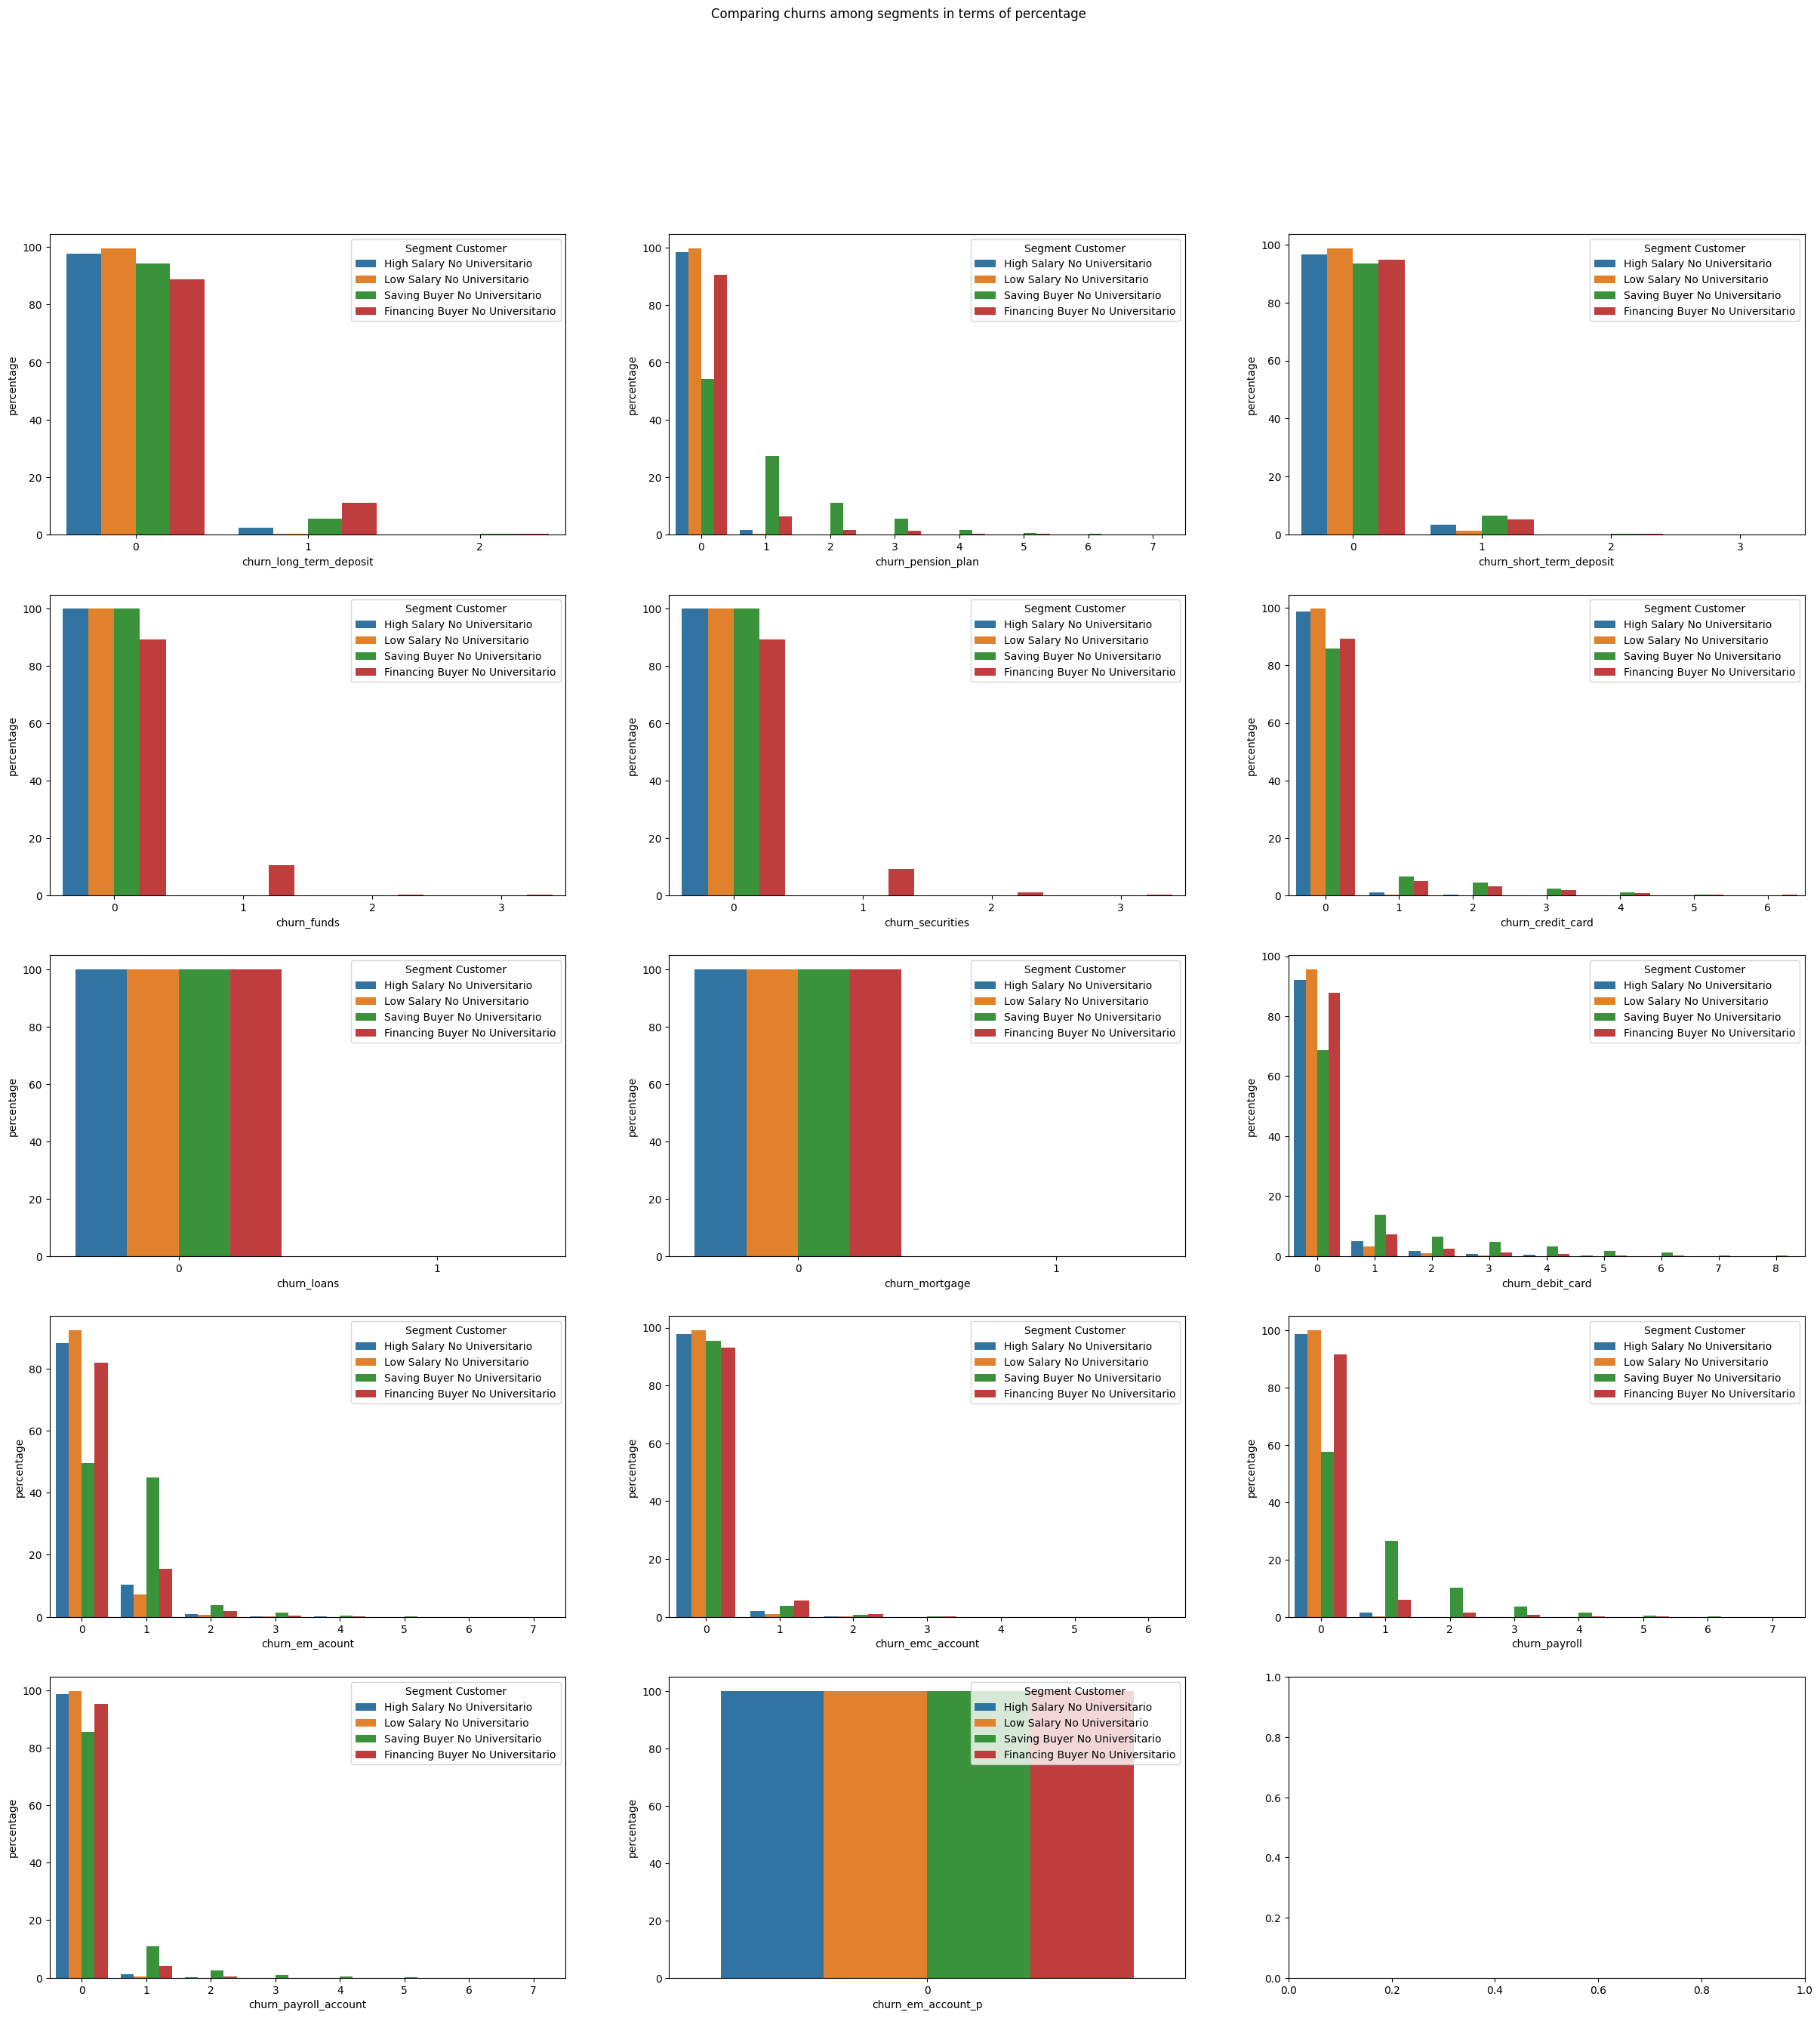

In [86]:
def get_percentages_by_segment(df,sales_cols_0,title):

    fig, axes = plt.subplots(5, 3)
    fig.suptitle(title)
    fig.set_size_inches(30,30)
    
    k=0
    for dx in [0,1,2,3,4]:
        for idx, sale in enumerate(sales_cols_0[k:3+k]):
            customers_percentages_by_segment=df.reset_index()[["pk_cid","Segment Customer",sale]].groupby(["Segment Customer",sale]).count()
            customers_percentages_by_segment=customers_percentages_by_segment.reset_index()

            high_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="High Salary No Universitario"]
            high_percentages["percentage"]=round(high_percentages["pk_cid"]/high_percentages["pk_cid"].sum()*100,1)

            low_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Low Salary No Universitario"]
            low_percentages["percentage"]=round(low_percentages["pk_cid"]/low_percentages["pk_cid"].sum()*100,1)

            sav_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Saving Buyer No Universitario"]
            sav_percentages["percentage"]=round(sav_percentages["pk_cid"]/sav_percentages["pk_cid"].sum()*100,1)

            fin_percentages=customers_percentages_by_segment[customers_percentages_by_segment["Segment Customer"]=="Financing Buyer No Universitario"]
            fin_percentages["percentage"]=round(fin_percentages["pk_cid"]/fin_percentages["pk_cid"].sum()*100,1)

            all_percentages=pd.concat([high_percentages,low_percentages,sav_percentages,fin_percentages])
            sns.barplot(all_percentages, x=sale, y="percentage", hue="Segment Customer", legend=True, ax=axes[dx][idx])

        k+=3

get_percentages_by_segment(customers_churn_cluster_no__,churn_cols_0,"Comparing churns among segments in terms of percentage")

Regarding the churn rate for each product, one can say that the trend is similiar to the sales, so, there is not to add.

After splitting the costumers by clusters according relevant features and sales behaviour, we are done to procced to the next step, which is make some predictions about the behaviour of the clients of each segment when faced with the marketing about specific products, ie, if he/she will buy the product or not.

__________________
# C. SAVE THE FILES
__________________

In [88]:
df_after_segmentation = pd.concat([segmentation_with_segment_customer_df,segmentation_with_segment_customer_no_univ_df])
df_after_segmentation.to_csv('df_after_segmentation.csv', index= False)